# Supervised Learning: Fraud Detection in E-Commerce

## Problem Definition
The objective of this study is to develop a binary classification model capable of detecting fraudulent e-commerce transactions. The target variable represents whether a transaction is fraudulent (`1`) or legitimate (`0`). The outcome of this model is intended to support the early identification of fraudulent activity, improving online transaction security.

## Dataset Description
This project utilizes two publicly available datasets:
- `Dataset1.csv`: A detailed transactional dataset that includes demographic, behavioral, and transactional features.
- `Dataset2.csv`: A more compact dataset focused on user and transaction metadata.

Given their complementary nature, these datasets will be merged to construct a richer feature space for model training.
However, the datasets present differences in their structure and attribute naming, which necessitates a standardization process before merging.

## Setup and Data Loading
We begin by importing the necessary libraries and loading the datasets.

In [68]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Load datasets
dataset1 = pd.read_csv('Datasets/Dataset1.csv')
dataset2 = pd.read_csv('Datasets/Dataset2.csv')

### Column Comparison
We first inspect the structure of both datasets to identify differences in column names and schema.

In [69]:
print("Dataset 1 Columns:\n", dataset1.columns, "\n")
print("Dataset 2 Columns:\n", dataset2.columns)

Dataset 1 Columns:
 Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object') 

Dataset 2 Columns:
 Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')


### Standardization
Several columns in dataset2 refer to similar concepts as those in dataset1, although with different names. We rename those columns to ensure semantic alignment.

In [70]:
dataset2_renamed = dataset2.rename(columns={
    'user_id': 'Customer ID',
    'purchase_time': 'Transaction Date',
    'purchase_value': 'Transaction Amount',
    'ip_address': 'IP Address',
    'age': 'Customer Age',
    'class': 'Is Fraudulent'
})

Additionally, we add missing columns with 'NaN' to maintain consistency across datasets.

In [71]:
missing_columns = set(dataset1.columns) - set(dataset2_renamed.columns)
for col in missing_columns:
    dataset2_renamed[col] = np.nan

# Align column order to match dataset1
dataset2_aligned = dataset2_renamed[dataset1.columns]

dataset2_aligned[dataset2_aligned.isna().any(axis=1)] #display the rows with na values

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,NaN,22058,34,2015-04-18 02:47:11,NaN,NaN,NaN,39,NaN,NaN,7.327584e+08,NaN,NaN,0,NaN,NaN
1,NaN,333320,16,2015-06-08 01:38:54,NaN,NaN,NaN,53,NaN,NaN,3.503114e+08,NaN,NaN,0,NaN,NaN
2,NaN,1359,15,2015-01-01 18:52:45,NaN,NaN,NaN,53,NaN,NaN,2.621474e+09,NaN,NaN,1,NaN,NaN
3,NaN,150084,44,2015-05-04 13:54:50,NaN,NaN,NaN,41,NaN,NaN,3.840542e+09,NaN,NaN,0,NaN,NaN
4,NaN,221365,39,2015-09-09 18:40:53,NaN,NaN,NaN,45,NaN,NaN,4.155831e+08,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,NaN,345170,43,2015-03-29 00:30:47,NaN,NaN,NaN,28,NaN,NaN,3.451155e+09,NaN,NaN,1,NaN,NaN
151108,NaN,274471,35,2015-05-26 12:24:39,NaN,NaN,NaN,32,NaN,NaN,2.439047e+09,NaN,NaN,0,NaN,NaN
151109,NaN,368416,40,2015-05-20 07:07:47,NaN,NaN,NaN,26,NaN,NaN,2.748471e+09,NaN,NaN,0,NaN,NaN
151110,NaN,207709,46,2015-09-07 09:34:46,NaN,NaN,NaN,37,NaN,NaN,3.601175e+09,NaN,NaN,0,NaN,NaN


### Merging the Datasets
With both datasets now aligned in schema, we concatenate them into a single unified dataset.

In [72]:
merged_data = pd.concat([dataset1, dataset2_aligned], ignore_index=True)

# Preview the merged dataset
merged_data.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1.0,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30.0,5.0
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2.0,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72.0,8.0
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2.0,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63.0,3.0
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,2024-03-16 20:41:31,bank transfer,clothing,5.0,31,Lynnberg,desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, UT 84798","828 Strong Loaf Apt. 646\nNew Joshua, UT 84798",0,124.0,20.0
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,2024-01-15 05:08:17,bank transfer,clothing,2.0,51,South Nicole,tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158.0,5.0


### Removal of Non-Analytical Columns
The merged dataset contains several columns; however, some of these, such as 'Transaction ID' and 'Customer ID', do not provide meaningful analytical value. As such, we will exclude these from the dataset.
The 'Shipping Address' and 'Billing Address' columns, while not directly useful for analysis on their own, may hold important insights regarding the potential for fraudulent activity when compared. Specifically, the match between these two addresses could indicate suspicious behavior. Therefore, instead of keeping both columns, we will create a new binary column, "Address Match," that will store 1 if the shipping and billing addresses match, and 0 if they do not.

In [73]:
merged_data.drop(columns=['Transaction ID', 'Customer ID', 'IP Address'], inplace=True)

merged_data['Address Match'] = (merged_data['Shipping Address'] == merged_data['Billing Address']).astype(int)

merged_data.drop(columns=['Shipping Address', 'Billing Address'], inplace=True)

# Preview the merged dataset
merged_data.head()
"Transaction.Hour","source","browser","sex","Payment.Method","Product.Category","Quantity","Device.Used","Address.Match"


('Transaction.Hour',
 'source',
 'browser',
 'sex',
 'Payment.Method',
 'Product.Category',
 'Quantity',
 'Device.Used',
 'Address.Match')

### Missing Value Analysis and Processing
We evaluate the presence of missing data in the merged dataset, which will guide the preprocessing steps that follow.

In [74]:
print("Missing values per column:\n", merged_data.isnull().sum())

Missing values per column:
 Transaction Amount         0
Transaction Date           0
Payment Method        151112
Product Category      151112
Quantity              151112
Customer Age               0
Customer Location     151112
Device Used           151112
Is Fraudulent              0
Account Age Days      151112
Transaction Hour      151112
Address Match              0
dtype: int64


To address missing values effectively, we will employ probability-based imputation. This approach leverages the distribution of known values within the dataset to generate plausible replacements for missing entries. By doing so, we maintain the integrity of the data while minimizing potential biases introduced by arbitrary filling methods.

In [75]:
def calculate_probabilities(col):
    '''Calculates the probability of the value appearing in the data frame'''
    data = merged_data[col][merged_data[col].notna()]
    probabilities = data.value_counts(normalize = True)
    return probabilities
print(calculate_probabilities("Device Used")) #just to show how the function works


Device Used
mobile     0.333849
tablet     0.333302
desktop    0.332849
Name: proportion, dtype: float64


In [76]:
#Perform the insertion of value in NA cells
for column in merged_data.columns:
    probabilities = calculate_probabilities(column)
    
    # Identify missing values
    na_mask = merged_data[column].isna()

    # Efficiently replace missing values using NumPy's choice function
    merged_data.loc[na_mask, column] = np.random.choice(list(probabilities.index), size=len(merged_data.loc[na_mask, column]), p=probabilities.values)

Now, there should not be any NA value in the dataframe.

In [77]:
print(f'Number of NA values in column \"Device Used \" : {merged_data.loc[merged_data["Device Used"].isna(), "Device Used"].count()}')

Number of NA values in column "Device Used " : 0


## Row Selection

The merged dataset has more than 1.5 milion rows. This huge number of rows makes the algorithms and other computaions very hard to perform. To make the dataset easier to process, we are going to select, randomly, 20% of the rows to procede the analysis.

In [78]:
import os

# only creates and stores a sample if it doesn't exists yet
if not os.path.exists("Datasets/sample_dataset.csv"):
    data_sample = merged_data.sample(frac=0.2)
    data_sample.to_csv("Datasets/sample_dataset.csv", index=False)

merged_data = pd.read_csv("Datasets/sample_dataset.csv")

## Outliers and Strange Values

In this section, we will identify outliers and other anomalies that may introduce biases or distort the integrity of the dataset. By detecting and addressing these irregular values, we aim to enhance data reliability and improve analytical accuracy.

Firstly, we need to plot the data to better visualize it.

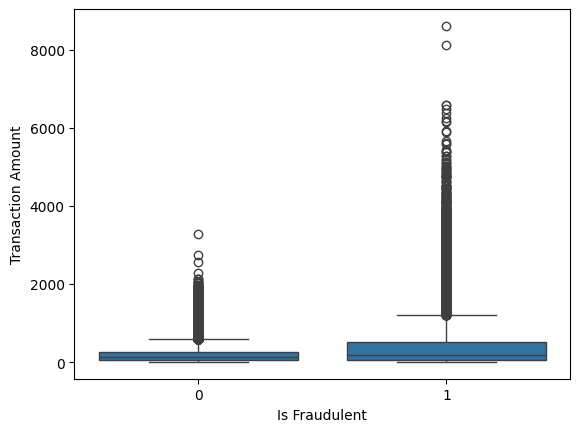

In [79]:
#Transaction amount comparison between fraudulent and legitimate transactions
sb.boxplot(x="Is Fraudulent", y="Transaction Amount", data=merged_data)
plt.show()

The plot reveals that fraudulent transactions exhibit a wider range of transaction amounts, but they tend to be larger than non-fraudulent transactions overall. Additionally, some values significantly exceed expected ranges, particularly within fraudulent transactions. 
To enhance precision and maintain data consistency, we need to remove rows where fraudulent transactions exceed 7,000 and non-fraudulent transactions surpass 2,500

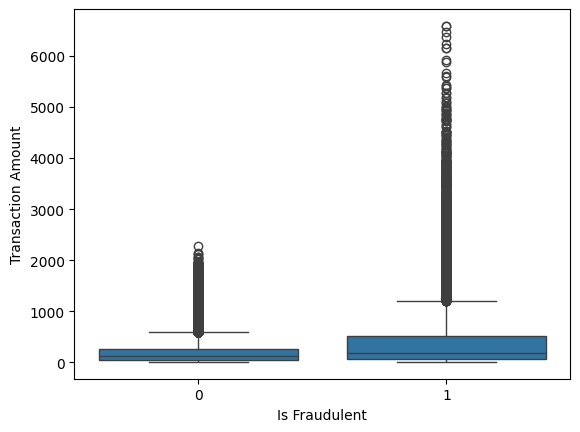

In [80]:
merged_data = merged_data[((merged_data["Transaction Amount"] < 7000) & (merged_data["Is Fraudulent"] == 1)) | ((merged_data["Transaction Amount"] < 2500) & (merged_data["Is Fraudulent"] == 0))]

sb.boxplot(x="Is Fraudulent", y="Transaction Amount", data=merged_data)
plt.show()

The data is now more consistent. However, some values in the fraudulent transactions still appear abnormal. To enhance precision, we can filter out rows where fraudulent transaction amounts exceed 5,500. This step will help eliminate significant outliers. Additionally, as a precautionary measure, we should remove any rows with transaction amounts below zero.

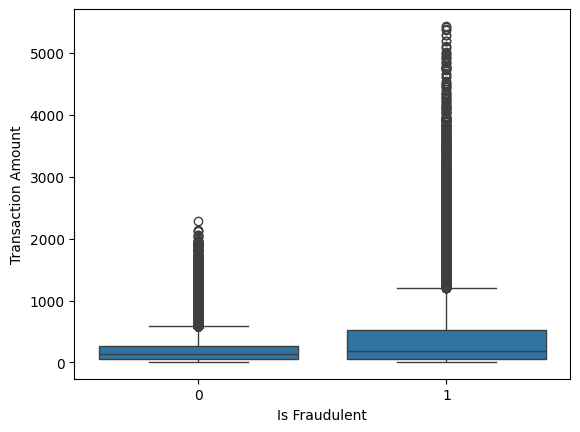

In [81]:
merged_data = merged_data[((merged_data["Transaction Amount"] < 5500) & (merged_data["Is Fraudulent"] == 1)) | ((merged_data["Transaction Amount"] < 2500) & (merged_data["Is Fraudulent"] == 0)) & (merged_data["Transaction Amount"] >= 0)]
sb.boxplot(x="Is Fraudulent", y="Transaction Amount", data=merged_data)
plt.show()

The next step is to analyse the dates an see if there is any strange pattern or outliers in the date values.

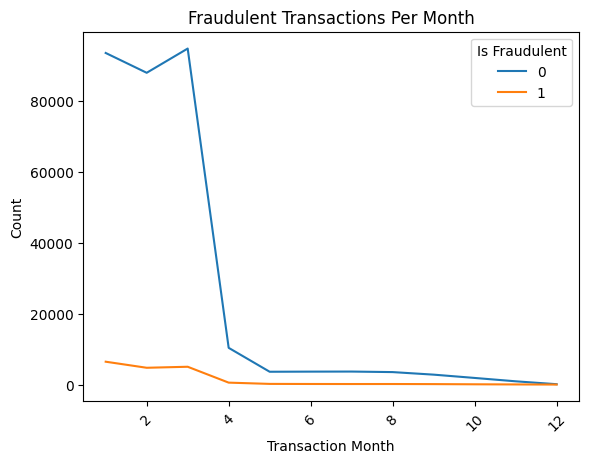

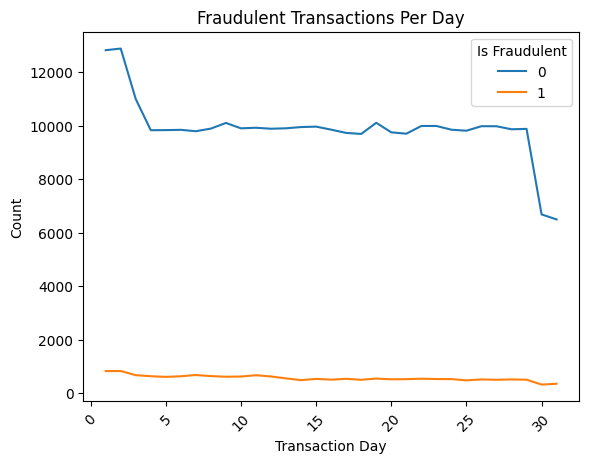

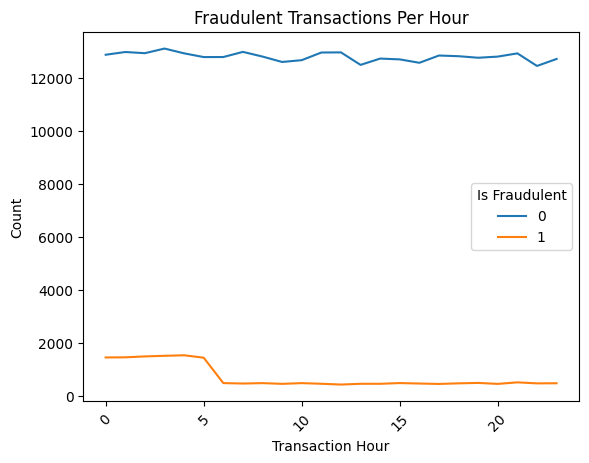

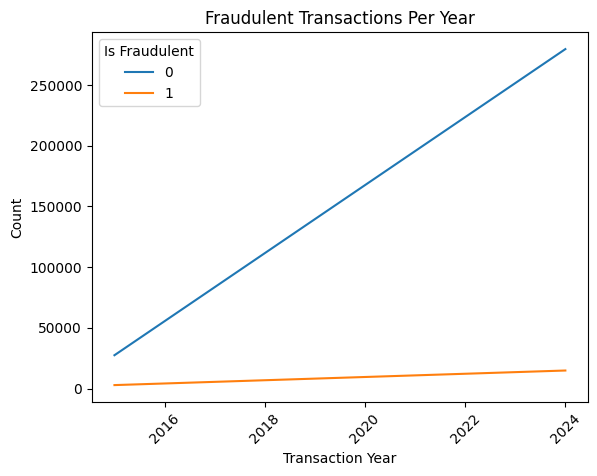

In [82]:
# Transaction Date comparison between fraudulent and legitimate transactions
merged_data["Transaction Date"] = pd.to_datetime(merged_data["Transaction Date"])
merged_data["Transaction Month"] = merged_data["Transaction Date"].dt.month
merged_data["Transaction Day"] = merged_data["Transaction Date"].dt.day
merged_data["Transaction Year"] = merged_data["Transaction Date"].dt.year

monthly_fraud = merged_data.groupby(["Transaction Month", "Is Fraudulent"]).size().reset_index(name="Count")
sb.lineplot(x="Transaction Month", y="Count", hue="Is Fraudulent", data=monthly_fraud)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Month")
plt.show()

daily_fraud = merged_data.groupby(["Transaction Day", "Is Fraudulent"]).size().reset_index(name="Count")
sb.lineplot(x="Transaction Day", y="Count", hue="Is Fraudulent", data=daily_fraud)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Day")
plt.show()

hour_fraud = merged_data.groupby(["Transaction Hour", "Is Fraudulent"]).size().reset_index(name="Count")
sb.lineplot(x="Transaction Hour", y="Count", hue="Is Fraudulent", data=hour_fraud)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Hour")
plt.show()

year_fraud = merged_data.groupby(["Transaction Year", "Is Fraudulent"]).size().reset_index(name="Count")
sb.lineplot(x="Transaction Year", y="Count", hue="Is Fraudulent", data=year_fraud)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Year")
plt.show()


The plots do not indicate any abnormalities in the data, such as outliers or unexpected values. The dataset contains only two years—2024 and 2015—due to the merging process at the beginning, where one dataset exclusively featured 2024 dates and the other contained records from 2015. Additionally, **fraudulent transactions** are more frequent between **midnight and 5 AM**, whereas non-fraudulent transactions remain relatively stable throughout this period. A slight increase in fraud is also noticeable in the early months of the year. However, since non-fraudulent transactions also rise during this period, this likely reflects a higher number of recorded transactions from the beginning of the year rather than an isolated fraud pattern.


Now, we will analyse the payment methods. 

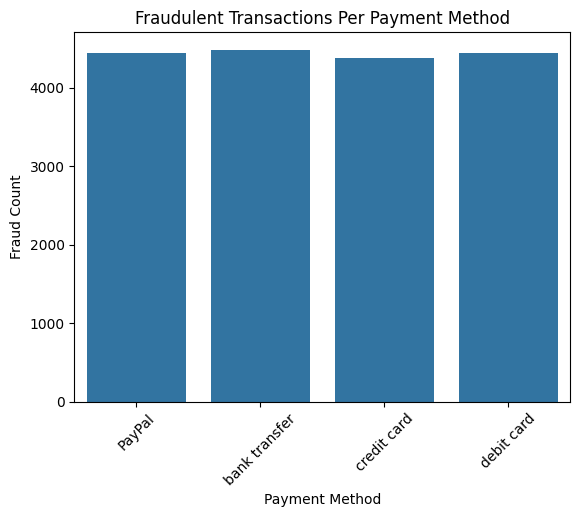

In [83]:
# Count fraudulent transactions
fraud_counts = merged_data[merged_data["Is Fraudulent"] == 1].groupby("Payment Method").size().reset_index(name="Fraud Count")

sb.barplot(x="Payment Method", y="Fraud Count", data=fraud_counts)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Payment Method")
plt.show()

The plot indicates that the number of fraudulent transactions across payment methods is nearly identical. To enhance visualization and gain deeper insights into how payment methods influence fraud, we should compare the ratio of fraudulent transactions per method to total transactions per method.

  Payment Method  Fraud Transactions  Total Transactions
0         PayPal                4442               80898
1  bank transfer                4485               81324
2    credit card                4380               81151
3     debit card                4446               81423


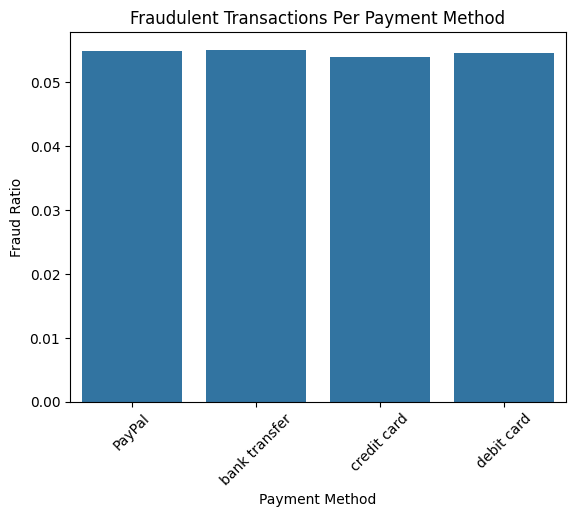

In [84]:
# Count total transactions per payment method
total_transactions = merged_data.groupby("Payment Method").size().reset_index(name="Total Transactions")

# Count fraudulent transactions per payment method
fraud_transactions = merged_data[merged_data["Is Fraudulent"] == 1].groupby("Payment Method").size().reset_index(name="Fraud Transactions")

# Merge both counts
fraud_ratio = fraud_transactions.merge(total_transactions, on="Payment Method", how="left")

print(fraud_ratio)

# Calculate fraud ratio
fraud_ratio["Fraud Ratio"] = fraud_ratio["Fraud Transactions"] / fraud_ratio["Total Transactions"]

sb.barplot(x="Payment Method", y="Fraud Ratio", data=fraud_ratio)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Payment Method")
plt.show()

After analyzing the ratio, we can see that it remains fairly consistent across different payment methods. As a result, it does not provide meaningful insights for identifying fraudulent transactions.

Now we are going to analyse the product category.

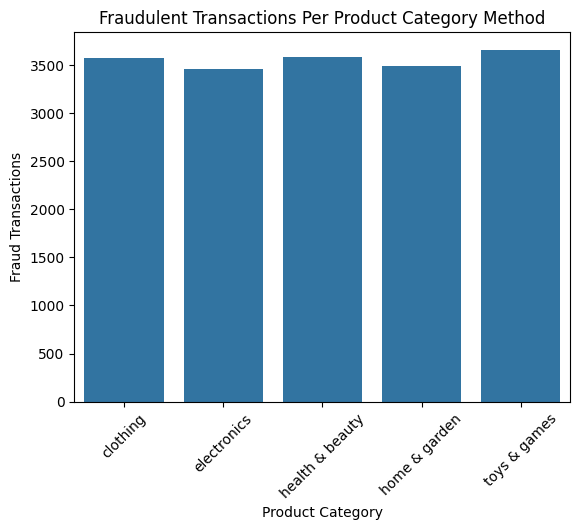

In [85]:
# Count fraudulent transactions per product category
fraud_transactions = merged_data[merged_data["Is Fraudulent"] == 1].groupby("Product Category").size().reset_index(name="Fraud Transactions")

sb.barplot(x="Product Category", y="Fraud Transactions", data=fraud_transactions)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Product Category Method")
plt.show()

The plot indicates no clear relationship between product category and fraudulent transactions. To gain deeper insights, we should analyze the ratio of fraudulent transactions per product category relative to the total number of transactions in each category.

  Product Category  Fraud Transactions  Total Transactions
0         clothing                3569               64813
1      electronics                3454               65328
2  health & beauty                3584               65016
3    home & garden                3488               64864
4     toys & games                3658               64775


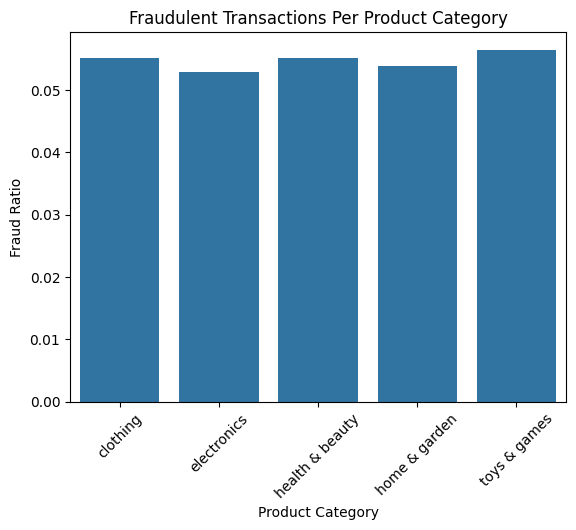

In [86]:
# Count total transactions per Product Category
total_transactions = merged_data.groupby("Product Category").size().reset_index(name="Total Transactions")

# Count fraudulent transactions per Product Category
fraud_transactions = merged_data[merged_data["Is Fraudulent"] == 1].groupby("Product Category").size().reset_index(name="Fraud Transactions")

# Merge both counts
fraud_ratio = fraud_transactions.merge(total_transactions, on="Product Category", how="left")

print(fraud_ratio)

# Calculate fraud ratio
fraud_ratio["Fraud Ratio"] = fraud_ratio["Fraud Transactions"] / fraud_ratio["Total Transactions"]

sb.barplot(x="Product Category", y="Fraud Ratio", data=fraud_ratio)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Product Category")
plt.show()

The ratio indicates that product category is not a strong predictor of fraudulent transactions. While the **"Toys and Games"** category shows a slightly higher fraud ratio, the difference is minimal and not statistically significant.

The next column to analyse is the Quantity

count    324796.000000
mean          2.999292
std           1.416152
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Quantity, dtype: float64


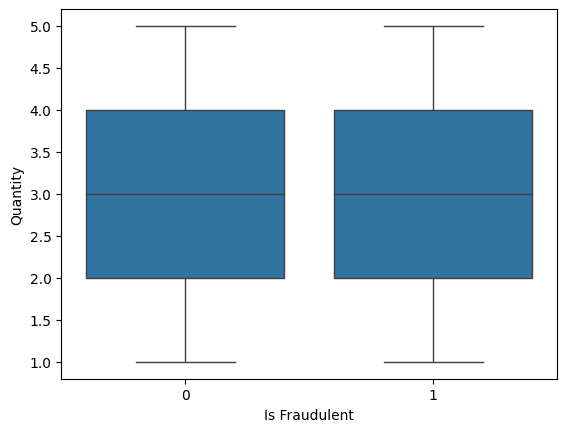

In [87]:
#Quantity comparison between fraudulent and legitimate transactions
print(merged_data["Quantity"].describe())
sb.boxplot(x="Is Fraudulent", y="Quantity", data=merged_data)
plt.show()

The quantity of items in transactions is similar for both fraudulent and non-fraudulent cases, with no detectable outliers in either category. In general, this column does not appear to be a strong indicator for identifying fraudulent transactions. 

Now we are going to analyse the customer age.

count    324796.000000
mean         34.384962
std           9.907287
min         -13.000000
25%          28.000000
50%          34.000000
75%          41.000000
max          80.000000
Name: Customer Age, dtype: float64


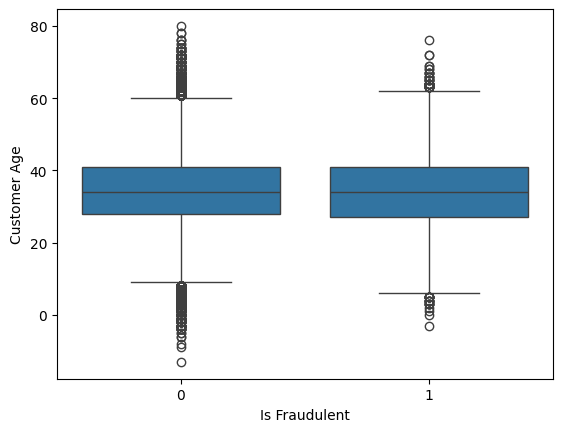

In [88]:
#Customer age comparison between fraudulent and legitimate transactions
print(merged_data["Customer Age"].describe())
sb.boxplot(x="Is Fraudulent", y="Customer Age", data=merged_data)
plt.show()

The data reveals some negative ages that need to be removed. While non-fraudulent transactions show more outliers than fraudulent ones, the average remains the same in both cases. Additionally, certain ages appear suspicious—customers under 18 should generally not be able to make transactions. The plot even shows transactions from customers under 10 years old, which is practically impossible. However, since we do not have access to the platform's age restrictions, we will only remove rows where the customer age is less than zero. In this case, outliers should not be removed—except for values over zero—since they do not significantly deviate from the average and the maximum value is a normal age for a person(80 years old). Additionally, these outliers primarily represent individuals who engage in fewer online transactions, such as the elderly and teenagers.

count    324743.000000
mean         34.391063
std           9.896536
min           0.000000
25%          28.000000
50%          34.000000
75%          41.000000
max          80.000000
Name: Customer Age, dtype: float64


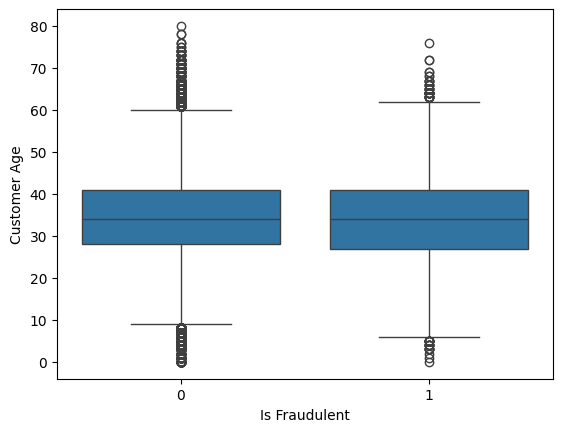

In [89]:
#Filter the data
merged_data = merged_data[merged_data["Customer Age"] >= 0]

#Customer age comparison between fraudulent and legitimate transactions with the filtered data
print(merged_data["Customer Age"].describe())
sb.boxplot(x="Is Fraudulent", y="Customer Age", data=merged_data)
plt.show()

Now, we are going to analyse the customer location.

      Customer Location  Fraud Transactions  Total Transactions  Fraud Ratio
294        Aprilchester                   3                   7     0.428571
602          Brandyfort                   3                   7     0.428571
835          Carriefort                   3                   7     0.428571
1226     Cunninghamstad                   3                   6     0.500000
2280        East Sherri                   3                   6     0.500000
5001         Leslieport                   4                  10     0.400000
5119       Lucaschester                   3                   6     0.500000
5493          Meyerview                   3                   6     0.500000
5678    Morrisonchester                   3                   7     0.428571
5718         Murraystad                   3                   7     0.428571
5721          Myersfort                   3                   7     0.428571
6722     North Amyshire                   3                   6     0.500000

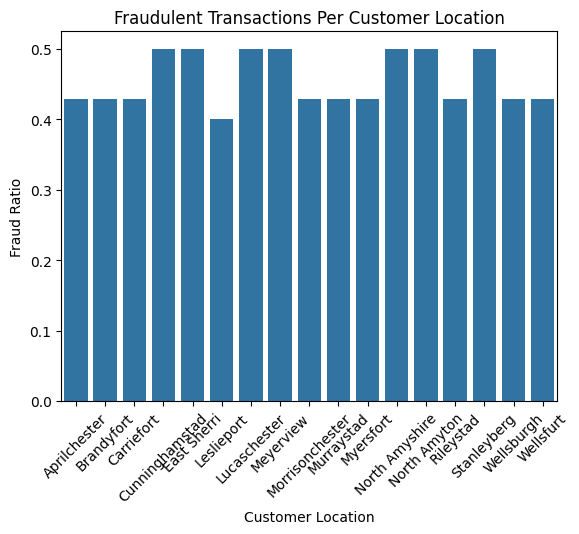

In [90]:
# Count total transactions per customer location
total_transactions = merged_data.groupby("Customer Location").size().reset_index(name="Total Transactions")

# Count fraudulent transactions per Customer Location
fraud_transactions = merged_data[merged_data["Is Fraudulent"] == 1].groupby("Customer Location").size().reset_index(name="Fraud Transactions")

# Merge both counts
fraud_ratio = fraud_transactions.merge(total_transactions, on="Customer Location", how="left")

# Calculate fraud ratio
fraud_ratio["Fraud Ratio"] = fraud_ratio["Fraud Transactions"] / fraud_ratio["Total Transactions"]

filtered_ratio = fraud_ratio[(fraud_ratio["Fraud Ratio"] >= 0.4) & (fraud_ratio["Total Transactions"] > 5)] #only shows the higher ratios (above average)
print(filtered_ratio)
print("Average Transactions per Location: " + str(total_transactions["Total Transactions"].sum() / len(total_transactions["Customer Location"].unique())))
print("Average Fraudulent Transactions per Location: " + str(fraud_transactions["Fraud Transactions"].sum() / len(total_transactions["Customer Location"].unique())))

sb.barplot(x="Customer Location", y="Fraud Ratio", data=filtered_ratio)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Customer Location")
plt.show()

The plot shows a big ratio in 17 locations considering the average number of total transactions and fraudulent transactions per location. These locations have more than 5 registered transactions and more than 40% of the transactions where flagged as fraudulent.

Now, we will analyse the devices used in the transactions.

  Device Used  Fraud Transactions  Total Transactions
0     desktop                5901              108303
1      mobile                6039              108142
2      tablet                5812              108298


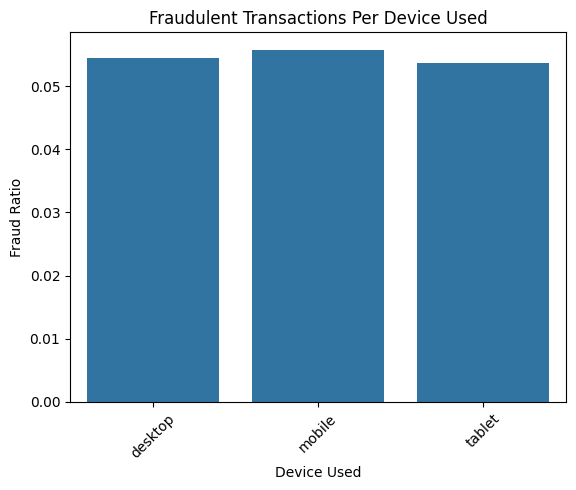

In [91]:
# Count total transactions per Device Used
total_transactions = merged_data.groupby("Device Used").size().reset_index(name="Total Transactions")

# Count fraudulent transactions per Device Used
fraud_transactions = merged_data[merged_data["Is Fraudulent"] == 1].groupby("Device Used").size().reset_index(name="Fraud Transactions")

# Merge both counts
fraud_ratio = fraud_transactions.merge(total_transactions, on="Device Used", how="left")

print(fraud_ratio)

# Calculate fraud ratio
fraud_ratio["Fraud Ratio"] = fraud_ratio["Fraud Transactions"] / fraud_ratio["Total Transactions"]

sb.barplot(x="Device Used", y="Fraud Ratio", data=fraud_ratio)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Device Used")
plt.show()

The plot shows that mobile devices have the highest ratio of frauds but the difference compared to other kinds of devices is minimal. The device used may not be the best to predict fraudulent transactions.

The next step will be the analysis of the adress match.

   Address Match  Fraud Transactions  Total Transactions
0              0                4351               59782
1              1               13401              264961


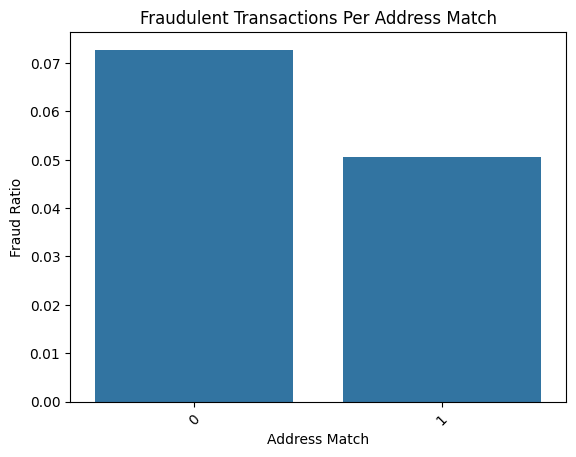

In [92]:
# Count total transactions per Device Used
total_transactions = merged_data.groupby("Address Match").size().reset_index(name="Total Transactions")

# Count fraudulent transactions per Device Used
fraud_transactions = merged_data[merged_data["Is Fraudulent"] == 1].groupby("Address Match").size().reset_index(name="Fraud Transactions")

# Merge both counts
fraud_ratio = fraud_transactions.merge(total_transactions, on="Address Match", how="left")

print(fraud_ratio)

# Calculate fraud ratio
fraud_ratio["Fraud Ratio"] = fraud_ratio["Fraud Transactions"] / fraud_ratio["Total Transactions"]

sb.barplot(x="Address Match", y="Fraud Ratio", data=fraud_ratio)
plt.xticks(rotation=45)
plt.title("Fraudulent Transactions Per Address Match")
plt.show()

Its clear that, when the billing and shipping addresses don't match, it is more likely the transaction to be fraudulent. However, the ratios are low in both cases.


The next step is to analyse the  account age.

count    324743.000000
mean        179.569185
std         106.954029
min           1.000000
25%          86.000000
50%         179.000000
75%         272.000000
max         365.000000
Name: Account Age Days, dtype: float64


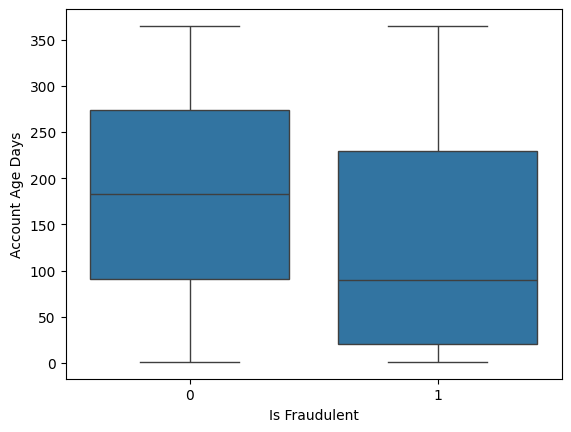

In [93]:
#Account age comparison between fraudulent and legitimate transactions
print(merged_data["Account Age Days"].describe())
sb.boxplot(x="Is Fraudulent", y="Account Age Days", data=merged_data)
plt.show()

The plot shows a clearly that the Fraudulent transactions are more predominat in newer accounts.

## ML Algorithms


The first thing we need to do is spliting the data into training and testing sets. To do this we will use scikit learn train_test_split method.

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create dictionary to store all model results
results = {}

# Function to add model results to the dictionary
def add_model_results(model_name, scenario, accuracy, precision, recall, f1):
    if model_name not in results:
        results[model_name] = {}
    
    results[model_name][scenario] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

In [95]:
#We need to convert the categorical data into a number format. To do this we will use the label encoder from scikit learn
from sklearn.preprocessing import LabelEncoder
#Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the categorical column
merged_data['Payment Method Encoded'] = label_encoder.fit_transform(merged_data['Payment Method'])
merged_data['Product Category Encoded'] = label_encoder.fit_transform(merged_data['Product Category'])
merged_data['Customer Location Encoded'] = label_encoder.fit_transform(merged_data['Customer Location'])
merged_data['Device Used Encoded'] = label_encoder.fit_transform(merged_data['Device Used'])

#Get the data from pandas. We are using almost all the columns, except the transation data but we will use the transaction day, month and hour separated. These data is going to get us the base line results 
data_for_input = merged_data[["Transaction Amount","Payment Method Encoded","Product Category Encoded","Quantity","Customer Age","Customer Location Encoded","Device Used Encoded","Account Age Days","Transaction Hour","Address Match", "Transaction Month", "Transaction Day"]]
inputs = data_for_input.values

labels = merged_data["Is Fraudulent"].values

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(inputs, labels, test_size=0.25, random_state=1)

### K Nearest Neighbors

Firstly, we will use the k nearest neighbors algorithm, one of the most simple, as a base line for other algorithms. It makes predictions based on the similarity between data points. It does not need a training phase; just stores data and calculates as needed.

In [96]:
import time

classifier = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

init_time = time.time()
#train the model with the training data (not really training but more like a data store on this algorithm)
classifier.fit(training_inputs, training_classes)
training_time = time.time() - init_time

init_time = time.time()
#test the model with the testing data
pred = classifier.predict(testing_inputs)
testing_time = time.time() - init_time

#Get the model results
accuracy = accuracy_score(testing_classes, pred)
precision = precision_score(testing_classes, pred)
recall = recall_score(testing_classes, pred)
f1= f1_score(testing_classes, pred)
c_matrix = confusion_matrix(testing_classes, pred)

add_model_results("KNN", "Baseline", accuracy, precision, recall, f1)

print(f"Model Accuracy: {accuracy:.2f}")
print(f"Model Precision: {precision:.2f}")
print(f"Model recall: {recall:.2f}")
print(f"Model f1_score: {f1:.2f}")
print(f"Model confusion matrix: {c_matrix}")
print(f"Testing time: {testing_time:.2f}")
print(f"Training time: {training_time:.2f}")

Model Accuracy: 0.95
Model Precision: 0.60
Model recall: 0.10
Model f1_score: 0.17
Model confusion matrix: [[76434   292]
 [ 4014   446]]
Testing time: 3.75
Training time: 1.55


The initial performance appears promising, especially given the **95% accuracy**. However, the **recall** and **F1-score** are significantly low, suggesting a **high rate of false positives**. This issue is likely due to the dataset's imbalance, causing the algorithm to favor the **non-fraudulent class**, which is more prevalent. As we will observe, this problem affects all evaluated algorithms—some performing slightly better, others worse. To address these challenges, we will explore possible improvements in a dedicated section of the notebook.

Now, we will attempt to enhance the results and improve consistency using cross-validation. As previously mentioned, additional improvements will be explored in a dedicated section of the notebook.

In [97]:
from sklearn.model_selection import cross_validate

cv_decision_tree = cross_validate(classifier, inputs, labels, cv=10, scoring=['precision', 'recall', 'f1', 'accuracy'], n_jobs= -1)

print(cv_decision_tree)
print(f"Average Model Accuracy: {cv_decision_tree['test_accuracy'].mean():.2f}")
print(f"Average Model Precision: {cv_decision_tree['test_precision'].mean():.2f}")
print(f"Average Model Recall: {cv_decision_tree['test_recall'].mean():.2f}")
print(f"Average Model f1_score: {cv_decision_tree['test_f1'].mean():.2f}")
print(f"Average Testing time: {cv_decision_tree['score_time'].mean():.2f}")
print(f"Training time: {cv_decision_tree['fit_time'].mean():.2f}")

{'fit_time': array([2.57637358, 3.15376878, 2.56237292, 2.65137672, 2.82711124,
       3.001127  , 2.29712629, 2.32647109, 2.43785119, 2.5670042 ]), 'score_time': array([2.16355991, 1.89615798, 2.06926179, 2.34757304, 2.016891  ,
       2.04944253, 1.77123356, 1.74010348, 1.580796  , 1.50064731]), 'test_precision': array([0.59150327, 0.61682243, 0.61512027, 0.55081967, 0.5621118 ,
       0.57507987, 0.61976048, 0.57741935, 0.60365854, 0.60126582]), 'test_recall': array([0.10197183, 0.11148649, 0.10078829, 0.09464789, 0.10197183,
       0.10140845, 0.11661972, 0.10084507, 0.1115493 , 0.10704225]), 'test_f1': array([0.17395483, 0.1888412 , 0.17319787, 0.16153846, 0.17262756,
       0.17241379, 0.19630156, 0.17170264, 0.18830243, 0.18173123]), 'test_accuracy': array([0.94706697, 0.94762125, 0.9473749 , 0.9462955 , 0.94657264,
       0.9467882 , 0.9478044 , 0.94681899, 0.94743487, 0.9473117 ])}
Average Model Accuracy: 0.95
Average Model Precision: 0.59
Average Model Recall: 0.10
Average Mo

As we can see, the results are not better than the standard algorithm but they are more consistent overall when we rerun the algorithm.

### Decision Tree

The second algorithm we will analyze is the decison tree. This algorithm  is a rule-based model that is easy to interpret and visualize and can handle both numerical and categorical data. It is also a good base line to compare with other algorithms

In [98]:
import time

#Get the decision tree classifier
classifier = DecisionTreeClassifier(class_weight="balanced")

init_time = time.time()
#train the model with the training data
classifier.fit(training_inputs, training_classes)
training_time = time.time() - init_time

init_time = time.time()
#test the model with the testing data
pred = classifier.predict(testing_inputs)
testing_time = time.time() - init_time

#Get the model results
accuracy = accuracy_score(testing_classes, pred)
precision = precision_score(testing_classes, pred)
recall = recall_score(testing_classes, pred)
f1= f1_score(testing_classes, pred)
c_matrix = confusion_matrix(testing_classes, pred)

add_model_results("Decision Tree", "Baseline", accuracy, precision, recall, f1)

print(f"Model Accuracy: {accuracy:.2f}")
print(f"Model Precision: {precision:.2f}")
print(f"Model recall: {recall:.2f}")
print(f"Model f1_score: {f1:.2f}")
print(f"Model confusion matrix: {c_matrix}")
print(f"Testing time: {testing_time:.2f}")
print(f"Training time: {training_time:.2f}")

Model Accuracy: 0.92
Model Precision: 0.25
Model recall: 0.25
Model f1_score: 0.25
Model confusion matrix: [[73403  3323]
 [ 3361  1099]]
Testing time: 0.02
Training time: 3.16


The initial performance of the model was promising, achieving **91% accuracy** on the first attempt. However, accuracy alone can be misleading, as the results vary significantly depending on the data split. To enhance **consistency and reliability**, we will apply **cross-validation**, ensuring a more stable evaluation across different subsets of the dataset.

Additionally, we observed that the model exhibits **low precision, recall, and F1-score**, indicating a **high number of false positives and false negatives**—particularly false positives. This is problematic since **misclassifying a legitimate transaction as fraudulent** can have negative consequences. The apparent high accuracy is deceptive, as it does not account for the imbalance between fraudulent and non-fraudulent transactions; the latter constitutes a much larger proportion of the dataset. These problems were previously observed in the K nearest neighbors algorithm.

Now, we will implement cross-validation, which—while only providing modest improvements due to the large dataset—will contribute to more consistent results. The sheer size of the dataset already facilitates stability, but cross-validation further reinforces the reliability of our model’s performance. Further enhancements, such as feature selection, will be addressed in a dedicated section of the notebook to allow a more structured approach to model optimization.


In [99]:

classifier = DecisionTreeClassifier(class_weight="balanced")

cv_decision_tree = cross_validate(classifier, inputs, labels, cv=10, scoring=['precision', 'recall', 'f1', 'accuracy'])

print(cv_decision_tree)
print(f"Average Model Accuracy: {cv_decision_tree['test_accuracy'].mean():.2f}")
print(f"Average Model Precision: {cv_decision_tree['test_precision'].mean():.2f}")
print(f"Average Model Recall: {cv_decision_tree['test_recall'].mean():.2f}")
print(f"Average Model f1_score: {cv_decision_tree['test_f1'].mean():.2f}")
print(f"Average Testing time: {cv_decision_tree['score_time'].mean():.2f}")
print(f"Training time: {cv_decision_tree['fit_time'].mean():.2f}")

{'fit_time': array([3.78423238, 3.81478834, 3.76609564, 4.02158809, 3.81910491,
       3.66761446, 3.90267658, 3.87953424, 3.93174648, 3.74659204]), 'score_time': array([0.02444243, 0.02341008, 0.05200386, 0.02342916, 0.02321696,
       0.02319956, 0.02199936, 0.02218413, 0.02262735, 0.02202487]), 'test_precision': array([0.25397727, 0.25832846, 0.25639568, 0.23374439, 0.24689966,
       0.24742268, 0.26826484, 0.25306838, 0.26508742, 0.24785346]), 'test_recall': array([0.25183099, 0.24887387, 0.25394144, 0.23492958, 0.24676056,
       0.24338028, 0.26478873, 0.24394366, 0.26478873, 0.24394366]), 'test_f1': array([0.25289958, 0.25351305, 0.25516266, 0.23433549, 0.24683009,
       0.24538483, 0.26651545, 0.24842226, 0.26493799, 0.24588302]), 'test_accuracy': array([0.9186759 , 0.91984604, 0.91892225, 0.91608672, 0.917688  ,
       0.9181807 , 0.92033627, 0.91932007, 0.9196896 , 0.91821149])}
Average Model Accuracy: 0.92
Average Model Precision: 0.25
Average Model Recall: 0.25
Average Mo

As previously mentioned, the cross-validation yielded little to no improvement.

### Support Vector Machine

The third algorithm we will analyze is the Support Vector Machine (SVM). Unlike decision trees, which use a set of rules to split the data, SVM focuses on finding the optimal boundary (hyperplane) that best separates fraudulent and legitimate transactions. SVM works by maximizing the margin between the two classes, making it effective for both linear and non-linear data through the use of different kernels. While SVM models are less interpretable than decision trees, they often provide higher accuracy, especially when the distinction between classes is not obvious. This makes SVM a strong alternative for fraud detection and a valuable comparison point for our baseline results.


In [100]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
training_inputs_scaled = scaler.fit_transform(training_inputs)
testing_inputs_scaled = scaler.transform(testing_inputs)

classifier = LinearSVC(max_iter=10000, random_state=1)
init_time = time.time()
classifier.fit(training_inputs_scaled, training_classes)
training_time = time.time() - init_time

init_time = time.time()
pred = classifier.predict(testing_inputs_scaled)
testing_time = time.time() - init_time

accuracy = accuracy_score(testing_classes, pred)
precision = precision_score(testing_classes, pred)
recall = recall_score(testing_classes, pred)
f1 = f1_score(testing_classes, pred)
c_matrix = confusion_matrix(testing_classes, pred)

print(f"Model Accuracy: {accuracy:.2f}")
print(f"Model Precision: {precision:.2f}")
print(f"Model recall: {recall:.2f}")
print(f"Model f1_score: {f1:.2f}")
print(f"Model confusion matrix: {c_matrix}")
print(f"Testing time: {testing_time:.2f}")
print(f"Training time: {training_time:.2f}")


Model Accuracy: 0.95
Model Precision: 1.00
Model recall: 0.04
Model f1_score: 0.08
Model confusion matrix: [[76726     0]
 [ 4284   176]]
Testing time: 0.00
Training time: 0.27


The initial performance of the Support Vector Machine (SVM) model appeared strong, achieving a 95% accuracy on the first attempt. However, this high accuracy is misleading due to the significant class imbalance present in the dataset. The model achieved a precision of 1.00, indicating that when it predicts a transaction as fraudulent, it is always correct. Despite this, the recall is extremely low at 0.04, meaning the model is only able to identify 4% of actual fraudulent transactions. This results in a very low F1-score of 0.08, highlighting the model’s inability to effectively detect fraud.

The confusion matrix further illustrates this issue, as the model predicts almost all transactions as non-fraudulent, missing the vast majority of fraudulent cases. This is problematic in a fraud detection context, where failing to identify fraudulent transactions (high false negatives) can have serious consequences. The high accuracy is primarily a reflection of the overwhelming number of legitimate transactions, rather than the model’s ability to detect fraud.

To address these shortcomings, we will explore techniques such as class balancing, threshold adjustment, and cross-validation to improve the model’s recall and overall robustness. These steps are essential to ensure the model is not only accurate but also effective at identifying fraudulent activity. Further enhancements, including feature selection and algorithm tuning, will be discussed in subsequent sections of the notebook.

In [101]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time
import numpy as np

# Scale features for better SVM performance
scaler = StandardScaler()
training_inputs_scaled = scaler.fit_transform(training_inputs)
testing_inputs_scaled = scaler.transform(testing_inputs)

# First, let's improve the model with class_weight='balanced'
classifier = LinearSVC(max_iter=10000, random_state=1, class_weight='balanced')
init_time = time.time()
classifier.fit(training_inputs_scaled, training_classes)
training_time = time.time() - init_time

init_time = time.time()
pred = classifier.predict(testing_inputs_scaled)
testing_time = time.time() - init_time

accuracy = accuracy_score(testing_classes, pred)
precision = precision_score(testing_classes, pred)
recall = recall_score(testing_classes, pred)
f1 = f1_score(testing_classes, pred)
c_matrix = confusion_matrix(testing_classes, pred)

add_model_results("SVM", "baseline", accuracy, precision, recall, f1)
    
print(f"Class-Balanced Model Results:")
print(f"Model Accuracy: {accuracy:.2f}")
print(f"Model Precision: {precision:.2f}")
print(f"Model Recall: {recall:.2f}")
print(f"Model F1-score: {f1:.2f}")
print(f"Model Confusion Matrix:\n{c_matrix}")
print(f"Testing time: {testing_time:.2f}")
print(f"Training time: {training_time:.2f}")

# Now, let's apply cross-validation to ensure robustness
print("\nCross-Validation Results:")
cv_results = cross_validate(
    classifier, 
    scaler.fit_transform(inputs),  # Scale all inputs for CV
    labels, 
    cv=5,
    scoring=['precision', 'recall', 'f1', 'accuracy'],
    n_jobs=-1
)

print(f"CV Average Accuracy: {cv_results['test_accuracy'].mean():.2f} ± {cv_results['test_accuracy'].std():.2f}")
print(f"CV Average Precision: {cv_results['test_precision'].mean():.2f} ± {cv_results['test_precision'].std():.2f}")
print(f"CV Average Recall: {cv_results['test_recall'].mean():.2f} ± {cv_results['test_recall'].std():.2f}")
print(f"CV Average F1-score: {cv_results['test_f1'].mean():.2f} ± {cv_results['test_f1'].std():.2f}")
print(f"CV Average Fit Time: {cv_results['fit_time'].mean():.2f} seconds")
print(f"CV Average Score Time: {cv_results['score_time'].mean():.2f} seconds")


Class-Balanced Model Results:
Model Accuracy: 0.70
Model Precision: 0.11
Model Recall: 0.65
Model F1-score: 0.19
Model Confusion Matrix:
[[54258 22468]
 [ 1581  2879]]
Testing time: 0.00
Training time: 0.33

Cross-Validation Results:
CV Average Accuracy: 0.70 ± 0.00
CV Average Precision: 0.11 ± 0.00
CV Average Recall: 0.64 ± 0.01
CV Average F1-score: 0.19 ± 0.00
CV Average Fit Time: 0.73 seconds
CV Average Score Time: 0.03 seconds


The introduction of class balancing to the SVM model caused a significant shift in performance metrics. While overall accuracy dropped to 70%, the model's ability to identify fraudulent transactions dramatically improved, with recall increasing from 0.04 to 0.65. This means the model now detects 65% of actual fraud cases, compared to only 4% previously.

This improvement in recall came at the cost of precision, which decreased to 0.11. The confusion matrix clearly illustrates this trade-off: the model now correctly identifies 2,879 fraudulent transactions (true positives) but also incorrectly flags 22,468 legitimate transactions as fraudulent (false positives).

Despite the lower precision, the F1-score improved to 0.19, representing a better balance between precision and recall than the original model. Cross-validation confirmed these results are consistent, with minimal variation across different data splits.

This pattern is expected when applying class balancing to highly imbalanced datasets, as the decision boundary shifts to favor the minority class. While the model now successfully identifies more fraudulent transactions, further refinement would be needed to reduce false positives.

### Logistic Regression

The next algorithm we will analyze is Logistic Regression. This is a linear model that estimates the probability of a transaction being fraudulent or legitimate using a logistic function. It is simple yet effective, especially for problems where the relationship between features and the target is roughly linear.

Unlike decision trees, which create explicit rules, Logistic Regression produces a model that outputs probabilities, which can be useful for ranking or threshold tuning. However, it can be sensitive to class imbalance, often underperforming on the minority class (fraudulent transactions). Techniques such as class weighting or resampling are often needed to address this.

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# Scale features for better Logistic Regression performance
scaler = StandardScaler()
training_inputs_scaled = scaler.fit_transform(training_inputs)
testing_inputs_scaled = scaler.transform(testing_inputs)

classifier = LogisticRegression(max_iter=10000, random_state=1)
init_time = time.time()
classifier.fit(training_inputs_scaled, training_classes)
training_time = time.time() - init_time

init_time = time.time()
pred = classifier.predict(testing_inputs_scaled)
testing_time = time.time() - init_time

accuracy = accuracy_score(testing_classes, pred)
precision = precision_score(testing_classes, pred)
recall = recall_score(testing_classes, pred)
f1 = f1_score(testing_classes, pred)
c_matrix = confusion_matrix(testing_classes, pred)

add_model_results("Logistic Regression", "baseline", accuracy, precision, recall, f1)

print(f"Model Accuracy: {accuracy:.2f}")
print(f"Model Precision: {precision:.2f}")
print(f"Model Recall: {recall:.2f}")
print(f"Model F1-Score: {f1:.2f}")
print(f"Confusion Matrix:\n{c_matrix}")
print(f"Training time: {training_time:.2f} seconds")
print(f"Testing time: {testing_time:.2f} seconds")


Model Accuracy: 0.95
Model Precision: 0.91
Model Recall: 0.08
Model F1-Score: 0.15
Confusion Matrix:
[[76690    36]
 [ 4095   365]]
Training time: 0.13 seconds
Testing time: 0.00 seconds


The initial model shows high accuracy (95%) and high precision (91%), but very low recall (8%). This means that while most legitimate transactions are correctly identified, the model fails to detect most fraud cases, which is a common problem in imbalanced datasets.


To gain a more reliable estimate of model performance across the dataset, we perform cross-validation using the same Logistic Regression model.

In [103]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

classifier = LogisticRegression(max_iter=10000, random_state=1)

cv_results = cross_validate(
    classifier,
    training_inputs_scaled,
    training_classes,
    cv=cv,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    n_jobs=-1
)

print("Cross-Validation Results:")
for metric in ['accuracy', 'precision', 'recall', 'f1']:
    scores = cv_results[f'test_{metric}']
    print(f"  {metric.capitalize()}: {np.mean(scores):.2f} ± {np.std(scores):.2f}")


Cross-Validation Results:
  Accuracy: 0.95 ± 0.00
  Precision: 0.90 ± 0.01
  Recall: 0.09 ± 0.00
  F1: 0.16 ± 0.00


### CatBoost Classifier
CatBoost is a gradient boosting algorithm that performs especially well on tabular datasets like the one used in this fraud detection task. It is known for its strong performance with minimal preprocessing and is robust to class imbalance when using class weights.

In the context of fraud detection, where fraudulent transactions are rare and hard to detect, CatBoost is a powerful model choice. It captures complex patterns in the data and can help improve recall without severely sacrificing precision, making it suitable for identifying more fraudulent cases.

Below, we train a CatBoost classifier with adjusted class_weights to account for the imbalance between legitimate and fraudulent transactions, and then evaluate its performance.

In [104]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# Initialize CatBoostClassifier
classifier_cb = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    random_seed=1,
    verbose=0,  # suppress training output
    class_weights=[1, 12]  # penalize minority class (fraud) more heavily
)

init_time = time.time()
classifier_cb.fit(training_inputs, training_classes)
training_time = time.time() - init_time

init_time = time.time()
pred_cb = classifier_cb.predict(testing_inputs)
testing_time = time.time() - init_time

accuracy_cb = accuracy_score(testing_classes, pred_cb)
precision_cb = precision_score(testing_classes, pred_cb)
recall_cb = recall_score(testing_classes, pred_cb)
f1_cb = f1_score(testing_classes, pred_cb)
c_matrix_cb = confusion_matrix(testing_classes, pred_cb)

add_model_results("CatBoost", "baseline", accuracy_cb, precision_cb, recall_cb, f1_cb)

print(f"CatBoost Accuracy: {accuracy_cb:.2f}")
print(f"CatBoost Precision: {precision_cb:.2f}")
print(f"CatBoost Recall: {recall_cb:.2f}")
print(f"CatBoost F1-Score: {f1_cb:.2f}")
print(f"CatBoost Confusion Matrix:\n{c_matrix_cb}")
print(f"Training time: {training_time:.2f} seconds")
print(f"Testing time: {testing_time:.2f} seconds")


CatBoost Accuracy: 0.88
CatBoost Precision: 0.25
CatBoost Recall: 0.57
CatBoost F1-Score: 0.35
CatBoost Confusion Matrix:
[[69073  7653]
 [ 1897  2563]]
Training time: 12.00 seconds
Testing time: 0.37 seconds


The CatBoost model achieves a balanced improvement, with recall at 0.57—slightly below the highest recall observed (0.65)—but significantly better F1-score (0.35), outperforming all other tested algorithms. This indicates CatBoost is better at balancing precision and recall, making it more effective overall for fraud detection. The use of class weights helps the model focus on the minority class, improving fraud detection without excessively increasing false positives.

Now let’s apply cross-validation to get a more reliable estimate of CatBoost’s performance across the dataset.

In [105]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
import numpy as np
import time

classifier_cb = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    random_seed=1,
    verbose=0,
    class_weights=[1, 12]
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)


cv_results = cross_validate(
    classifier_cb,
    training_inputs,
    training_classes,
    cv=cv,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    n_jobs=-1,
    return_train_score=False
)

print(f"CV Average Accuracy: {np.mean(cv_results['test_accuracy']):.2f} ± {np.std(cv_results['test_accuracy']):.2f}")
print(f"CV Average Precision: {np.mean(cv_results['test_precision']):.2f} ± {np.std(cv_results['test_precision']):.2f}")
print(f"CV Average Recall: {np.mean(cv_results['test_recall']):.2f} ± {np.std(cv_results['test_recall']):.2f}")
print(f"CV Average F1-score: {np.mean(cv_results['test_f1']):.2f} ± {np.std(cv_results['test_f1']):.2f}")
print(f"CV Average Fit Time: {np.mean(cv_results['fit_time']):.2f} seconds")
print(f"CV Average Score Time: {np.mean(cv_results['score_time']):.2f} seconds")


CV Average Accuracy: 0.88 ± 0.00
CV Average Precision: 0.25 ± 0.00
CV Average Recall: 0.56 ± 0.00
CV Average F1-score: 0.34 ± 0.00
CV Average Fit Time: 44.27 seconds
CV Average Score Time: 0.20 seconds


The cross-validation results closely match the single-run metrics, confirming that the model’s performance is stable and generalizes well across different data splits.

### XGBoost
XGBoost is a fast, scalable gradient boosting algorithm that handles class imbalance via the scale_pos_weight parameter.
This makes it well-suited for fraud detection, where the positive class (fraud) is rare.


In [106]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time
import numpy as np

unique, counts = np.unique(training_classes, return_counts=True)
scale_pos_weight = counts[0] / counts[1]

classifier_xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=6,
    random_state=1,
    scale_pos_weight=scale_pos_weight,  # boost importance of minority class
    eval_metric='logloss',
    n_jobs=-1
)

init_time = time.time()
classifier_xgb.fit(training_inputs, training_classes)
training_time_xgb = time.time() - init_time

init_time = time.time()
pred_xgb = classifier_xgb.predict(testing_inputs)
testing_time_xgb = time.time() - init_time

accuracy_xgb = accuracy_score(testing_classes, pred_xgb)
precision_xgb = precision_score(testing_classes, pred_xgb)
recall_xgb = recall_score(testing_classes, pred_xgb)
f1_xgb = f1_score(testing_classes, pred_xgb)
c_matrix_xgb = confusion_matrix(testing_classes, pred_xgb)

print("### XGBoost Classifier")
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")
print(f"XGBoost Precision: {precision_xgb:.2f}")
print(f"XGBoost Recall: {recall_xgb:.2f}")
print(f"XGBoost F1-Score: {f1_xgb:.2f}")
print(f"XGBoost Confusion Matrix:\n{c_matrix_xgb}")
print(f"Training time: {training_time_xgb:.2f} seconds")
print(f"Testing time: {testing_time_xgb:.2f} seconds")

add_model_results("XGBoost", "baseline", accuracy_xgb, precision_xgb, recall_xgb, f1_xgb)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

cv_results = cross_validate(
    classifier_xgb,
    training_inputs,
    training_classes,
    cv=cv,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    n_jobs=-1,
    return_train_score=False
)

print("\nCross-Validation Results:")
print(f"CV Average Accuracy: {np.mean(cv_results['test_accuracy']):.2f} ± {np.std(cv_results['test_accuracy']):.2f}")
print(f"CV Average Precision: {np.mean(cv_results['test_precision']):.2f} ± {np.std(cv_results['test_precision']):.2f}")
print(f"CV Average Recall: {np.mean(cv_results['test_recall']):.2f} ± {np.std(cv_results['test_recall']):.2f}")
print(f"CV Average F1-score: {np.mean(cv_results['test_f1']):.2f} ± {np.std(cv_results['test_f1']):.2f}")
print(f"CV Average Fit Time: {np.mean(cv_results['fit_time']):.2f} seconds")
print(f"CV Average Score Time: {np.mean(cv_results['score_time']):.2f} seconds")

### XGBoost Classifier
XGBoost Accuracy: 0.84
XGBoost Precision: 0.20
XGBoost Recall: 0.60
XGBoost F1-Score: 0.30
XGBoost Confusion Matrix:
[[65943 10783]
 [ 1804  2656]]
Training time: 2.98 seconds
Testing time: 0.15 seconds

Cross-Validation Results:
CV Average Accuracy: 0.85 ± 0.00
CV Average Precision: 0.20 ± 0.00
CV Average Recall: 0.58 ± 0.01
CV Average F1-score: 0.30 ± 0.00
CV Average Fit Time: 10.98 seconds
CV Average Score Time: 0.51 seconds


### Random Forest Classifier
Random Forest is an ensemble learning method that constructs multiple decision trees and outputs the mode of their predictions.
It is effective for tabular data and can handle class imbalance using the `class_weight='balanced'` parameter.


In [107]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=1,
    class_weight='balanced',  # automatically adjust weights inversely proportional to class frequencies
    n_jobs=-1
)

init_time = time.time()
classifier_rf.fit(training_inputs, training_classes)
training_time_rf = time.time() - init_time

init_time = time.time()
pred_rf = classifier_rf.predict(testing_inputs)
testing_time_rf = time.time() - init_time

accuracy_rf = accuracy_score(testing_classes, pred_rf)
precision_rf = precision_score(testing_classes, pred_rf)
recall_rf = recall_score(testing_classes, pred_rf)
f1_rf = f1_score(testing_classes, pred_rf)
c_matrix_rf = confusion_matrix(testing_classes, pred_rf)

add_model_results("Random Forest", "baseline", accuracy_rf, precision_rf, recall_rf, f1_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest Precision: {precision_rf:.2f}")
print(f"Random Forest Recall: {recall_rf:.2f}")
print(f"Random Forest F1-Score: {f1_rf:.2f}")
print(f"Random Forest Confusion Matrix:\n{c_matrix_rf}")
print(f"Training time: {training_time_rf:.2f} seconds")
print(f"Testing time: {testing_time_rf:.2f} seconds")

Random Forest Accuracy: 0.95
Random Forest Precision: 0.76
Random Forest Recall: 0.17
Random Forest F1-Score: 0.27
Random Forest Confusion Matrix:
[[76489   237]
 [ 3712   748]]
Training time: 12.28 seconds
Testing time: 0.37 seconds


Now let’s apply cross-validation to get a more reliable estimate of Random Forest performance across the dataset.

In [108]:
from sklearn.model_selection import cross_validate, StratifiedKFold
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

classifier_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=1,
    class_weight='balanced',
    n_jobs=-1
)

cv_results_rf = cross_validate(
    classifier_rf,
    training_inputs,
    training_classes,
    cv=cv,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    n_jobs=-1,
    return_train_score=False
)

print("Cross-Validation Results:")
print(f"CV Average Accuracy: {np.mean(cv_results_rf['test_accuracy']):.2f} ± {np.std(cv_results_rf['test_accuracy']):.2f}")
print(f"CV Average Precision: {np.mean(cv_results_rf['test_precision']):.2f} ± {np.std(cv_results_rf['test_precision']):.2f}")
print(f"CV Average Recall: {np.mean(cv_results_rf['test_recall']):.2f} ± {np.std(cv_results_rf['test_recall']):.2f}")
print(f"CV Average F1-score: {np.mean(cv_results_rf['test_f1']):.2f} ± {np.std(cv_results_rf['test_f1']):.2f}")
print(f"CV Average Fit Time: {np.mean(cv_results_rf['fit_time']):.2f} seconds")
print(f"CV Average Score Time: {np.mean(cv_results_rf['score_time']):.2f} seconds")


Cross-Validation Results:
CV Average Accuracy: 0.95 ± 0.00
CV Average Precision: 0.75 ± 0.01
CV Average Recall: 0.16 ± 0.00
CV Average F1-score: 0.26 ± 0.01
CV Average Fit Time: 46.16 seconds
CV Average Score Time: 0.81 seconds


## ML Algorithm with enhancements 

In this section we will improve the results previously obtained. We will try to find the best feature set and parameters for each algorithm in order to get the best results possible.

We will use SelectKBest to find the best features.

In [109]:
from sklearn.feature_selection import RFE, SelectKBest


selector = SelectKBest(k=5)  # Select top 5 features
X_selected = selector.fit_transform(inputs, labels)
selected_indices = selector.get_support(indices=True)
selected_features_names = [ data_for_input.iloc[:, idx].name for idx in selected_indices]
print(selected_features_names)


['Transaction Amount', 'Account Age Days', 'Transaction Hour', 'Address Match', 'Transaction Month']


It is possible to see that the features selected by the algorithm are the ones we previously analised to be more relevant to the classification of fraudulent transactions.

Now we need to create a new testing and training set only with these selected features

In [110]:
#Get the data from pandas. We are using almost all the columns, except the transation data but we will use the transaction day, month and hour separated. These data is going to get us the base line results 
data_for_input = merged_data[selected_features_names]
inputs = data_for_input.values

labels = merged_data["Is Fraudulent"].values

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(inputs, labels, test_size=0.25, random_state=1)

### Enhanced K Nearest Neighbor

The first results we will try to improve are the ones from the k nearest neighbor algorithm. We will be firstly just use the improved feature set

In [111]:
classifier = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

init_time = time.time()
#train the model with the training data (not really training but more like a data store on this algorithm)
classifier.fit(training_inputs, training_classes)
training_time = time.time() - init_time

init_time = time.time()
#test the model with the testing data
pred = classifier.predict(testing_inputs)
testing_time = time.time() - init_time

#Get the model results
accuracy = accuracy_score(testing_classes, pred)
precision = precision_score(testing_classes, pred)
recall = recall_score(testing_classes, pred)
f1= f1_score(testing_classes, pred)
c_matrix = confusion_matrix(testing_classes, pred)

print(f"Model Accuracy: {accuracy:.2f}")
print(f"Model Precision: {precision:.2f}")
print(f"Model recall: {recall:.2f}")
print(f"Model f1_score: {f1:.2f}")
print(f"Model confusion matrix: {c_matrix}")
print(f"Testing time: {testing_time:.2f}")
print(f"Training time: {training_time:.2f}")

Model Accuracy: 0.95
Model Precision: 0.54
Model recall: 0.16
Model f1_score: 0.25
Model confusion matrix: [[76131   595]
 [ 3752   708]]
Testing time: 3.58
Training time: 0.67


In [112]:
cv_decision_tree = cross_validate(classifier, inputs, labels, cv=10, scoring=['precision', 'recall', 'f1', 'accuracy'])

print(cv_decision_tree)
print(f"Average Model Accuracy: {cv_decision_tree['test_accuracy'].mean():.2f}")
print(f"Average Model Precision: {cv_decision_tree['test_precision'].mean():.2f}")
print(f"Average Model Recall: {cv_decision_tree['test_recall'].mean():.2f}")
print(f"Average Model f1_score: {cv_decision_tree['test_f1'].mean():.2f}")
print(f"Average Testing time: {cv_decision_tree['score_time'].mean():.2f}")
print(f"Training time: {cv_decision_tree['fit_time'].mean():.2f}")

{'fit_time': array([0.81169486, 0.82367992, 0.80976486, 0.81464028, 0.8035934 ,
       0.80919695, 0.8303113 , 0.79892826, 0.798491  , 0.79169583]), 'score_time': array([1.47789001, 1.44829655, 1.48833227, 1.44270229, 1.44728327,
       1.46222138, 1.43957043, 1.42701125, 1.39211154, 1.41601276]), 'test_precision': array([0.56701031, 0.556     , 0.54043393, 0.52653061, 0.55360624,
       0.51663405, 0.5716946 , 0.57936508, 0.53874539, 0.57715431]), 'test_recall': array([0.15492958, 0.15653153, 0.15427928, 0.14535211, 0.16      ,
       0.14873239, 0.17295775, 0.16450704, 0.16450704, 0.16225352]), 'test_f1': array([0.24336283, 0.24428822, 0.24003504, 0.22781457, 0.24825175,
       0.23097113, 0.26557093, 0.25625274, 0.25205006, 0.25329815]), 'test_accuracy': array([0.94734411, 0.94703618, 0.94657429, 0.94614153, 0.94703455,
       0.94586438, 0.94771202, 0.9478044 , 0.94663423, 0.94771202])}
Average Model Accuracy: 0.95
Average Model Precision: 0.55
Average Model Recall: 0.16
Average Mo

The enhanced feature set led to a slight improvement in the algorithm's recall and F1-score. However, the overall impact was minimal.

To further improve the results, we will perform a GridSearchCV to find the best parameters for this algorithm. Firstly, we are going to focus on the accuracy

In [113]:
# Define the hyperparameter grid
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(5, 50, 5),
    'n_jobs' : [-1],
    'weights': ['uniform', 'distance'],  
    'algorithm': ['ball_tree', 'kd_tree'],   
}

# Initialize GridSearchCV
grid_search = GridSearchCV(classifier, param_grid, cv=10, scoring=['precision', 'recall', 'f1', 'accuracy'], refit='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(training_inputs, training_classes)

# Get the best parameters
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_:.2f}')

Best Parameters: {'algorithm': 'ball_tree', 'n_jobs': -1, 'n_neighbors': 30, 'weights': 'uniform'}
Best Accuracy: 0.95


In [114]:
best_index = grid_search.best_index_

print(f"Average Model Accuracy: {grid_search.cv_results_['mean_test_accuracy'][best_index]:.2f}")
print(f"Average Model Precision: {grid_search.cv_results_['mean_test_precision'][best_index].mean():.2f}")
print(f"Average Model Recall: {grid_search.cv_results_['mean_test_recall'][best_index].mean():.2f}")
print(f"Average Model f1_score: {grid_search.cv_results_['mean_test_f1'][best_index].mean():.2f}")
print(f"Average Testing time: {grid_search.cv_results_['mean_score_time'][best_index].mean():.2f}")
print(f"Training time: {grid_search.cv_results_['mean_fit_time'][best_index].mean():.2f}")

Average Model Accuracy: 0.95
Average Model Precision: 0.80
Average Model Recall: 0.12
Average Model f1_score: 0.20
Average Testing time: 3.30
Training time: 1.05


By focusing on accuracy in the GridSearch, the results show strong performance in terms of precision and accuracy, achieving **95% accuracy and 80% precision**. However, this approach led to a slight decline in recall and F1-score, which were already suboptimal and have now worsened.

To achieve a better balance between precision and recall, we should prioritize F1-score as the optimization metric in the GridSearch

In [115]:
# Define the hyperparameter grid
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(5, 50, 5),
    'n_jobs' : [-1],
    'weights': ['uniform', 'distance'],  
    'algorithm': ['ball_tree', 'kd_tree'],   
}

# Initialize GridSearchCV
grid_search = GridSearchCV(classifier, param_grid, cv=10, scoring=['precision', 'recall', 'f1', 'accuracy'], refit='f1', n_jobs=-1)

# Fit the model
grid_search.fit(training_inputs, training_classes)

# Get the best parameters
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best F1 Score: {grid_search.best_score_:.2f}')

Best Parameters: {'algorithm': 'kd_tree', 'n_jobs': -1, 'n_neighbors': 5, 'weights': 'distance'}
Best F1 Score: 0.24


In [116]:
best_index = grid_search.best_index_

add_model_results("KNN", "enhanced", 
                 grid_search.cv_results_['mean_test_accuracy'][best_index],
                 grid_search.cv_results_['mean_test_precision'][best_index].mean(),
                 grid_search.cv_results_['mean_test_recall'][best_index].mean(),
                 grid_search.cv_results_['mean_test_f1'][best_index].mean())

print(f"Average Model Accuracy: {grid_search.cv_results_['mean_test_accuracy'][best_index]:.2f}")
print(f"Average Model Precision: {grid_search.cv_results_['mean_test_precision'][best_index].mean():.2f}")
print(f"Average Model Recall: {grid_search.cv_results_['mean_test_recall'][best_index].mean():.2f}")
print(f"Average Model f1_score: {grid_search.cv_results_['mean_test_f1'][best_index].mean():.2f}")
print(f"Average Testing time: {grid_search.cv_results_['mean_score_time'][best_index].mean():.2f}")
print(f"Training time: {grid_search.cv_results_['mean_fit_time'][best_index].mean():.2f}")

Average Model Accuracy: 0.95
Average Model Precision: 0.51
Average Model Recall: 0.16
Average Model f1_score: 0.24
Average Testing time: 0.23
Training time: 0.91


The highest achievable **F1-score is only 24%**, likely due to the dataset's imbalance. While accuracy remains high, precision has declined. Despite these limitations, the algorithm shows potential for fraud detection once the imbalance issue is addressed, as it can achieve promising accuracy and precision—especially considering its simplicity. The imbalance problem will be explored in a later section.

### Enhanced Decision Tree

The first results we will try to improve are the ones from the decision tree algorithm. We will use the improved feature set and set the class weight as balanced.

In [117]:
#Get the decision tree classifier
classifier = DecisionTreeClassifier(class_weight="balanced")

init_time = time.time()
#train the model with the training data
classifier.fit(training_inputs, training_classes)
training_time = time.time() - init_time

init_time = time.time()
#test the model with the testing data
pred = classifier.predict(testing_inputs)
testing_time = time.time() - init_time

#Get the model results
accuracy = accuracy_score(testing_classes, pred)
precision = precision_score(testing_classes, pred)
recall = recall_score(testing_classes, pred)
f1= f1_score(testing_classes, pred)
c_matrix = confusion_matrix(testing_classes, pred)

print(f"Model Accuracy: {accuracy:.2f}")
print(f"Model Precision: {precision:.2f}")
print(f"Model recall: {recall:.2f}")
print(f"Model f1_score: {f1:.2f}")
print(f"Model confusion matrix: {c_matrix}")
print(f"Testing time: {testing_time:.2f}")
print(f"Training time: {training_time:.2f}")

Model Accuracy: 0.92
Model Precision: 0.25
Model recall: 0.25
Model f1_score: 0.25
Model confusion matrix: [[73452  3274]
 [ 3363  1097]]
Testing time: 0.02
Training time: 1.71


In [118]:
cv_decision_tree = cross_validate(classifier, inputs, labels, cv=10, scoring=['precision', 'recall', 'f1', 'accuracy'])

print(cv_decision_tree)

print(f"Average Model Accuracy: {cv_decision_tree['test_accuracy'].mean():.2f}")
print(f"Average Model Precision: {cv_decision_tree['test_precision'].mean():.2f}")
print(f"Average Model Recall: {cv_decision_tree['test_recall'].mean():.2f}")
print(f"Average Model f1_score: {cv_decision_tree['test_f1'].mean():.2f}")
print(f"Average Testing time: {cv_decision_tree['score_time'].mean():.2f}")
print(f"Training time: {cv_decision_tree['fit_time'].mean():.2f}")

{'fit_time': array([2.01916742, 2.02625084, 1.92966151, 2.13210511, 1.93471098,
       2.07576752, 2.06688666, 2.03818154, 2.23138022, 1.82201982]), 'score_time': array([0.0252223 , 0.02540469, 0.0232048 , 0.02571344, 0.02758193,
       0.02242446, 0.02353835, 0.02424097, 0.0255065 , 0.02289391]), 'test_precision': array([0.2480983 , 0.26547619, 0.27935943, 0.24165708, 0.24472808,
       0.26312785, 0.26336746, 0.23755009, 0.249859  , 0.26639102]), 'test_recall': array([0.23887324, 0.25112613, 0.2652027 , 0.23661972, 0.2484507 ,
       0.25971831, 0.26084507, 0.23380282, 0.24957746, 0.25408451]), 'test_f1': array([0.24339839, 0.25810185, 0.27209705, 0.23911187, 0.24657534,
       0.26141196, 0.2621002 , 0.23566156, 0.24971815, 0.26009227]), 'test_accuracy': array([0.91882987, 0.92104696, 0.92240185, 0.917688  , 0.91701053,
       0.91978198, 0.91972039, 0.91710291, 0.91802673, 0.92098294])}
Average Model Accuracy: 0.92
Average Model Precision: 0.26
Average Model Recall: 0.25
Average Mo

The results show that the improved data set is not impacting the results from decision tree algorithm. To help improve even more the results, we will going to perform a parameter tuning using gridSearchCV

In [119]:
# Define the hyperparameter grid
from sklearn.model_selection import GridSearchCV


#we will not use limit depth because the best is the deepest in this dataset
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': [i for i in range(2,11)],
    'class_weight' : ["balanced"]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(classifier, param_grid, cv=10, scoring=['precision', 'recall', 'f1', 'accuracy'], refit='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(training_inputs, training_classes)

# Get the best parameters
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_:.2f}')

Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 2, 'splitter': 'best'}
Best Accuracy: 0.92


In [120]:
best_index = grid_search.best_index_

print(f"Average Model Accuracy: {grid_search.cv_results_['mean_test_accuracy'][best_index]:.2f}")
print(f"Average Model Precision: {grid_search.cv_results_['mean_test_precision'][best_index].mean():.2f}")
print(f"Average Model Recall: {grid_search.cv_results_['mean_test_recall'][best_index].mean():.2f}")
print(f"Average Model f1_score: {grid_search.cv_results_['mean_test_f1'][best_index].mean():.2f}")
print(f"Average Testing time: {grid_search.cv_results_['mean_score_time'][best_index].mean():.2f}")
print(f"Training time: {grid_search.cv_results_['mean_fit_time'][best_index].mean():.2f}")

Average Model Accuracy: 0.92
Average Model Precision: 0.25
Average Model Recall: 0.23
Average Model f1_score: 0.24
Average Testing time: 0.03
Training time: 0.92


Using the best possible parameters to get the highest accuracy possible the results were mostly the same. No significant improvements were achieved

To improve the fraud detection while mantaing low the number of false positives and negative, we can use as refit value the f1_score. The f1_score gives the balace between the precision and recall values

In [121]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': [i for i in range(2,11)],
    'class_weight' : ["balanced"]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(classifier, param_grid, cv=10, scoring=['precision', 'recall', 'f1', 'accuracy'], refit='f1', n_jobs=-1)

# Fit the model
grid_search.fit(training_inputs, training_classes)

# Get the best parameters
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best F1 Score: {grid_search.best_score_:.2f}')

Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 9, 'splitter': 'best'}
Best F1 Score: 0.25


In [124]:
best_index = grid_search.best_index_

add_model_results("Decision Tree", "enhanced",
                 grid_search.cv_results_['mean_test_accuracy'][best_index],
                 grid_search.cv_results_['mean_test_precision'][best_index].mean(),
                 grid_search.cv_results_['mean_test_recall'][best_index].mean(),
                 grid_search.cv_results_['mean_test_f1'][best_index].mean())

print(f"Average Model Accuracy: {grid_search.cv_results_['mean_test_accuracy'][best_index]:.2f}")
print(f"Average Model Precision: {grid_search.cv_results_['mean_test_precision'][best_index].mean():.2f}")
print(f"Average Model Recall: {grid_search.cv_results_['mean_test_recall'][best_index].mean():.2f}")
print(f"Average Model f1_score: {grid_search.cv_results_['mean_test_f1'][best_index].mean():.2f}")
print(f"Average Testing time: {grid_search.cv_results_['mean_score_time'][best_index].mean():.2f}")
print(f"Training time: {grid_search.cv_results_['mean_fit_time'][best_index].mean():.2f}")

Average Model Accuracy: 0.92
Average Model Precision: 0.25
Average Model Recall: 0.25
Average Model f1_score: 0.25
Average Testing time: 0.03
Training time: 2.55


We see that the best f1_score possible to obtain is 0.25 wich is very bad. Both the precision and recall are very low. After all the improvements, we can conclude that this dataset and problem may not be ideal for the Decision tree algorithm.

### Enhanced Support Vector Machine

Next we will try to improve the results given by the Support Vector Machine algorithm.

In [125]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Scale the data
scaler = StandardScaler()
training_inputs_scaled = scaler.fit_transform(training_inputs)
testing_inputs_scaled = scaler.transform(testing_inputs)

# Define parameter grid for LinearSVC
param_grid = {
    'C': [0.1, 1, 10],
    'class_weight': ['balanced']
}

# Step 1: Grid search to find best parameters
grid_search = GridSearchCV(
    LinearSVC(max_iter=10000, random_state=1, class_weight="balanced"),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(training_inputs_scaled, training_classes)

print("Best parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

# Step 2: Get best model from grid search
best_linear_svm = grid_search.best_estimator_

# Step 3: Add cross-validation on the best model
cv_results = cross_validate(
    best_linear_svm,
    training_inputs_scaled,
    training_classes,
    cv=10,
    scoring=['precision', 'recall', 'f1', 'accuracy'],
    n_jobs=-1
)

# Print cross-validation results
print("\nCross-Validation Results on Best Model:")
print(f"CV Average Accuracy: {cv_results['test_accuracy'].mean():.2f} ± {cv_results['test_accuracy'].std():.2f}")
print(f"CV Average Precision: {cv_results['test_precision'].mean():.2f} ± {cv_results['test_precision'].std():.2f}")
print(f"CV Average Recall: {cv_results['test_recall'].mean():.2f} ± {cv_results['test_recall'].std():.2f}")
print(f"CV Average F1-Score: {cv_results['test_f1'].mean():.2f} ± {cv_results['test_f1'].std():.2f}")
print(f"CV Average Fit Time: {cv_results['fit_time'].mean():.2f} seconds")


# Step 4: Final evaluation on test set
pred = best_linear_svm.predict(testing_inputs_scaled)
print("\nTest Set Evaluation:")
print("Test Accuracy:", round(accuracy_score(testing_classes, pred), 2))
print("Test Precision:", round(precision_score(testing_classes, pred), 2))
print("Test Recall:", round(recall_score(testing_classes, pred), 2))
print("Test F1-score:", round(f1_score(testing_classes, pred), 2))
print("Confusion Matrix:\n", confusion_matrix(testing_classes, pred))

add_model_results("SVM", "enhanced",
                 accuracy_score(testing_classes, pred),
                 precision_score(testing_classes, pred),
                 recall_score(testing_classes, pred),
                 f1_score(testing_classes, pred))

Best parameters: {'C': 0.1, 'class_weight': 'balanced'}
Best F1-score: 0.19169832283135313

Cross-Validation Results on Best Model:
CV Average Accuracy: 0.70 ± 0.00
CV Average Precision: 0.11 ± 0.00
CV Average Recall: 0.65 ± 0.01
CV Average F1-Score: 0.19 ± 0.00
CV Average Fit Time: 0.41 seconds

Test Set Evaluation:
Test Accuracy: 0.7
Test Precision: 0.11
Test Recall: 0.64
Test F1-score: 0.19
Confusion Matrix:
 [[54242 22484]
 [ 1610  2850]]


We can see that the linear SVM can identify a good portion of fraudulent transactions (recall ≈ 0.64), but at cost at many false positives since the precision is very low. This is a normal trade-off in imbalanced datasets like ours.

### Enhanced Logistic Regression

Next we will try to improve the results given by the Logistic Regression algorithm, with class weighting and hyperparamenter tuning using grid search with cross-validation.

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# Scale data
scaler = StandardScaler()
training_inputs_scaled = scaler.fit_transform(training_inputs)
testing_inputs_scaled = scaler.transform(testing_inputs)

# Define parameter grid for LogisticRegression
param_grid = {
    'C': [0.1, 1, 10],
    'class_weight': ['balanced']
}

# grid search to find best parameters
grid_search = GridSearchCV(
    LogisticRegression(max_iter=10000, random_state=1),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(training_inputs_scaled, training_classes)

print("Best parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

# get the best model from grid search
best_logreg = grid_search.best_estimator_

cv_results = cross_validate(
    best_logreg,
    training_inputs_scaled,
    training_classes,
    cv=10,
    scoring=['precision', 'recall', 'f1', 'accuracy'],
    n_jobs=-1
)

print("\nCross-Validation Results on Best Logistic Regression Model:")
print(f"CV Average Accuracy: {cv_results['test_accuracy'].mean():.2f} ± {cv_results['test_accuracy'].std():.2f}")
print(f"CV Average Precision: {cv_results['test_precision'].mean():.2f} ± {cv_results['test_precision'].std():.2f}")
print(f"CV Average Recall: {cv_results['test_recall'].mean():.2f} ± {cv_results['test_recall'].std():.2f}")
print(f"CV Average F1-Score: {cv_results['test_f1'].mean():.2f} ± {cv_results['test_f1'].std():.2f}")
print(f"CV Average Fit Time: {cv_results['fit_time'].mean():.2f} seconds")

# final evaluation on test set
init_time = time.time()
best_logreg.fit(training_inputs_scaled, training_classes)
training_time = time.time() - init_time

init_time = time.time()
pred = best_logreg.predict(testing_inputs_scaled)
testing_time = time.time() - init_time

add_model_results("Logistic Regression", "enhanced",
                 accuracy_score(testing_classes, pred),
                 precision_score(testing_classes, pred),
                 recall_score(testing_classes, pred),
                 f1_score(testing_classes, pred))

print("\nTest Set Evaluation:")
print("Test Accuracy:", round(accuracy_score(testing_classes, pred), 2))
print("Test Precision:", round(precision_score(testing_classes, pred), 2))
print("Test Recall:", round(recall_score(testing_classes, pred), 2))
print("Test F1-score:", round(f1_score(testing_classes, pred), 2))
print("Confusion Matrix:\n", confusion_matrix(testing_classes, pred))
print(f"Training time: {training_time:.2f} seconds")
print(f"Testing time: {testing_time:.2f} seconds")


Best parameters: {'C': 0.1, 'class_weight': 'balanced'}
Best F1-score: 0.19059881040923857

Cross-Validation Results on Best Logistic Regression Model:
CV Average Accuracy: 0.70 ± 0.00
CV Average Precision: 0.11 ± 0.00
CV Average Recall: 0.65 ± 0.01
CV Average F1-Score: 0.19 ± 0.00
CV Average Fit Time: 0.23 seconds

Test Set Evaluation:
Test Accuracy: 0.7
Test Precision: 0.11
Test Recall: 0.64
Test F1-score: 0.19
Confusion Matrix:
 [[53980 22746]
 [ 1590  2870]]
Training time: 0.16 seconds
Testing time: 0.00 seconds


With these enhancements:
*    Recall improves dramatically (from 8% to 64%), showing that the model is now much better at detecting fraud.
*    However, precision drops to 11%, meaning more false positives (legitimate transactions misclassified as fraud).
*    Overall accuracy decreases to 70%, but F1-score increases, indicating a better trade-off between recall and precision.

### Enhanced CatBoost Classifier

Next we will try to improve the results given by the CatBoost Classifier algorithm.

In [127]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# Define parameter grid for CatBoostClassifier
param_grid = {
    'iterations': [100, 200],
    'learning_rate': [0.05, 0.1],
    'depth': [4, 6],
    'class_weights': [[1, 10], [1, 12]]
}

catboost_model = CatBoostClassifier(
    random_seed=1,
    verbose=0,
    early_stopping_rounds=20,          # stop early if no improvement in 20 rounds
)

# grid search to find best parameters
grid_search = GridSearchCV(
    estimator=catboost_model,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid_search.fit(training_inputs, training_classes)
training_time = time.time() - start_time

print("Best parameters:", grid_search.best_params_)
print("Best F1-score from GridSearchCV:", grid_search.best_score_)

# get best model from grid search
best_cb = grid_search.best_estimator_

# add cross-validation on the best model
cv_results = cross_validate(
    best_cb,
    training_inputs,
    training_classes,
    cv=5,
    scoring=['precision', 'recall', 'f1', 'accuracy'],
    n_jobs=-1
)

print("\nCross-Validation Results on Best CatBoost Model:")
print(f"CV Average Accuracy: {cv_results['test_accuracy'].mean():.2f} ± {cv_results['test_accuracy'].std():.2f}")
print(f"CV Average Precision: {cv_results['test_precision'].mean():.2f} ± {cv_results['test_precision'].std():.2f}")
print(f"CV Average Recall: {cv_results['test_recall'].mean():.2f} ± {cv_results['test_recall'].std():.2f}")
print(f"CV Average F1-Score: {cv_results['test_f1'].mean():.2f} ± {cv_results['test_f1'].std():.2f}")
print(f"CV Average Fit Time: {cv_results['fit_time'].mean():.2f} seconds")

# final evaluation on test set
start_time = time.time()
pred_cb = best_cb.predict(testing_inputs)
testing_time = time.time() - start_time

add_model_results("CatBoost", "enhanced",
                    accuracy_score(testing_classes, pred_cb),
                    precision_score(testing_classes, pred_cb),
                    recall_score(testing_classes, pred_cb),
                    f1_score(testing_classes, pred_cb))

print("\nTest Set Evaluation:")
print("Test Accuracy:", round(accuracy_score(testing_classes, pred_cb), 2))
print("Test Precision:", round(precision_score(testing_classes, pred_cb), 2))
print("Test Recall:", round(recall_score(testing_classes, pred_cb), 2))
print("Test F1-score:", round(f1_score(testing_classes, pred_cb), 2))
print("Confusion Matrix:\n", confusion_matrix(testing_classes, pred_cb))
print(f"Training time (Grid Search + Fit): {training_time:.2f} seconds")
print(f"Testing time: {testing_time:.2f} seconds")


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'class_weights': [1, 10], 'depth': 6, 'iterations': 200, 'learning_rate': 0.1}
Best F1-score from GridSearchCV: 0.34535332146442865

Cross-Validation Results on Best CatBoost Model:
CV Average Accuracy: 0.88 ± 0.00
CV Average Precision: 0.25 ± 0.00
CV Average Recall: 0.55 ± 0.01
CV Average F1-Score: 0.34 ± 0.00
CV Average Fit Time: 16.77 seconds

Test Set Evaluation:
Test Accuracy: 0.88
Test Precision: 0.25
Test Recall: 0.57
Test F1-score: 0.35
Confusion Matrix:
 [[69267  7459]
 [ 1938  2522]]
Training time (Grid Search + Fit): 88.76 seconds
Testing time: 0.22 seconds


### Enhanced XGBoost Classifier

Next we will try to improve the results given by the XGBoost Classifier algorithm.

In [128]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

unique, counts = np.unique(training_classes, return_counts=True)
scale_pos_weight = counts[0] / counts[1]

# define parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# grid search to find best parameters
xgb = XGBClassifier(
    random_state=1,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    use_label_encoder=False,
    n_jobs=-1,
    verbosity=0
)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(training_inputs, training_classes)

print("Best parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

# get best model from grid search
best_xgb = grid_search.best_estimator_

# add cross-validation on the best model
cv_5fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

cv_results = cross_validate(
    best_xgb,
    training_inputs,
    training_classes,
    cv=cv_5fold,
    scoring=['precision', 'recall', 'f1', 'accuracy'],
    n_jobs=-1
)

print("\nCross-Validation Results on Best Model:")
print(f"CV Average Accuracy: {cv_results['test_accuracy'].mean():.2f} ± {cv_results['test_accuracy'].std():.2f}")
print(f"CV Average Precision: {cv_results['test_precision'].mean():.2f} ± {cv_results['test_precision'].std():.2f}")
print(f"CV Average Recall: {cv_results['test_recall'].mean():.2f} ± {cv_results['test_recall'].std():.2f}")
print(f"CV Average F1-Score: {cv_results['test_f1'].mean():.2f} ± {cv_results['test_f1'].std():.2f}")
print(f"CV Average Fit Time: {cv_results['fit_time'].mean():.2f} seconds")

# final evaluation on test set
pred = best_xgb.predict(testing_inputs)

add_model_results("XGBoost", "enhanced",
                 accuracy_score(testing_classes, pred),
                 precision_score(testing_classes, pred),
                 recall_score(testing_classes, pred),
                 f1_score(testing_classes, pred))

print("\nTest Set Evaluation:")
print("Test Accuracy:", round(accuracy_score(testing_classes, pred), 2))
print("Test Precision:", round(precision_score(testing_classes, pred), 2))
print("Test Recall:", round(recall_score(testing_classes, pred), 2))
print("Test F1-score:", round(f1_score(testing_classes, pred), 2))
print("Confusion Matrix:\n", confusion_matrix(testing_classes, pred))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1.0}
Best F1-score: 0.3062168476658732

Cross-Validation Results on Best Model:
CV Average Accuracy: 0.85 ± 0.00
CV Average Precision: 0.20 ± 0.01
CV Average Recall: 0.62 ± 0.01
CV Average F1-Score: 0.30 ± 0.01
CV Average Fit Time: 2.08 seconds

Test Set Evaluation:
Test Accuracy: 0.84
Test Precision: 0.2
Test Recall: 0.63
Test F1-score: 0.3
Confusion Matrix:
 [[65394 11332]
 [ 1653  2807]]


### Enhanced Random Forest Classifier

Next we will try to improve the results given by the Random Forest Classifier algorithm.

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time
import numpy as np

# define parameter grid for RandomForest
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

# setup RandomForestClassifier
rf = RandomForestClassifier(
    random_state=1,
    n_jobs=-1
)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

# grid search for best hyperparameters
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid_search.fit(training_inputs, training_classes)
training_time_grid = time.time() - start_time

print("Best parameters:", grid_search.best_params_)
print("Best F1-score from GridSearch:", grid_search.best_score_)

# get best model from grid search
best_rf = grid_search.best_estimator_

# cross-validation on the best model (5 folds)
cv_5fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

cv_results = cross_validate(
    best_rf,
    training_inputs,
    training_classes,
    cv=cv_5fold,
    scoring=['precision', 'recall', 'f1', 'accuracy'],
    n_jobs=-1
)

print("\nCross-Validation Results on Best Random Forest Model:")
print(f"CV Average Accuracy: {cv_results['test_accuracy'].mean():.2f} ± {cv_results['test_accuracy'].std():.2f}")
print(f"CV Average Precision: {cv_results['test_precision'].mean():.2f} ± {cv_results['test_precision'].std():.2f}")
print(f"CV Average Recall: {cv_results['test_recall'].mean():.2f} ± {cv_results['test_recall'].std():.2f}")
print(f"CV Average F1-Score: {cv_results['test_f1'].mean():.2f} ± {cv_results['test_f1'].std():.2f}")
print(f"CV Average Fit Time: {cv_results['fit_time'].mean():.2f} seconds")

# final evaluation on test set
start_time = time.time()
pred = best_rf.predict(testing_inputs)
testing_time = time.time() - start_time

add_model_results("Random Forest", "enhanced",accuracy_score(testing_classes, pred),
                 precision_score(testing_classes, pred),
                 recall_score(testing_classes, pred),
                 f1_score(testing_classes, pred))

print("\nTest Set Evaluation:")
print("Test Accuracy:", round(accuracy_score(testing_classes, pred), 2))
print("Test Precision:", round(precision_score(testing_classes, pred), 2))
print("Test Recall:", round(recall_score(testing_classes, pred), 2))
print("Test F1-score:", round(f1_score(testing_classes, pred), 2))
print("Confusion Matrix:\n", confusion_matrix(testing_classes, pred))
print(f"Training time (Grid Search + Fit): {training_time_grid:.2f} seconds")
print(f"Testing time: {testing_time:.2f} seconds")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best F1-score from GridSearch: 0.3617090329227752

Cross-Validation Results on Best Random Forest Model:
CV Average Accuracy: 0.93 ± 0.00
CV Average Precision: 0.39 ± 0.01
CV Average Recall: 0.35 ± 0.01
CV Average F1-Score: 0.36 ± 0.01
CV Average Fit Time: 95.23 seconds

Test Set Evaluation:
Test Accuracy: 0.93
Test Precision: 0.38
Test Recall: 0.36
Test F1-score: 0.37
Confusion Matrix:
 [[74136  2590]
 [ 2850  1610]]
Training time (Grid Search + Fit): 1613.30 seconds
Testing time: 0.88 seconds


### Balanced Dataset

Our dataset has a lot of non-fraudulent transactions and a lot of lines, this makes it really hard and slow for the algorithms to achieve good results.

This significant class imbalance means that most machine learning models tend to favor the majority class (legitimate transactions), resulting in high accuracy but poor recall for fraudulent cases. As a consequence, the models may fail to detect many fraudulent transactions, which is critical in a fraud detection context.

To address this, we will apply data balancing techniques. These include:
- **Undersampling** the majority class to reduce its dominance (this is the procedure we took),
- **Oversampling** the minority class (fraudulent transactions) using methods like SMOTE,
- Or a combination of both.

By balancing the dataset, we aim to provide the algorithms with a more representative sample of both classes, improving their ability to detect fraud while maintaining reasonable performance on legitimate transactions. This step is essential for building robust and fair fraud detection models.

In [130]:
# Separate fraudulent and non-fraudulent transactions
fraud = merged_data[merged_data['Is Fraudulent'] == 1]
non_fraud = merged_data[merged_data['Is Fraudulent'] == 0]

# Randomly sample non-fraudulent transactions to match the number of fraudulent ones
non_fraud_sampled = non_fraud.sample(n=len(fraud), random_state=42)

# Concatenate the two to form a balanced dataset
balanced_data = pd.concat([fraud, non_fraud_sampled])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
print(balanced_data['Is Fraudulent'].value_counts())


Is Fraudulent
0    17752
1    17752
Name: count, dtype: int64


In [131]:

balanced_data['Transaction Date'] = pd.to_datetime(balanced_data['Transaction Date'])
balanced_data['Transaction Month'] = balanced_data['Transaction Date'].dt.month
balanced_data['Transaction Day'] = balanced_data['Transaction Date'].dt.day
balanced_data['Transaction Hour'] = balanced_data['Transaction Date'].dt.hour


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
balanced_data['Payment Method Encoded'] = label_encoder.fit_transform(balanced_data['Payment Method'])
balanced_data['Product Category Encoded'] = label_encoder.fit_transform(balanced_data['Product Category'])
balanced_data['Customer Location Encoded'] = label_encoder.fit_transform(balanced_data['Customer Location'])
balanced_data['Device Used Encoded'] = label_encoder.fit_transform(balanced_data['Device Used'])


#Selected features previously (best 5)
X = balanced_data[selected_features_names].values
y = balanced_data["Is Fraudulent"].values


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### K-Nearest Neighbors with Balanced Dataset

Using the balanced dataset, we will try to improve the previous results obtained with the **K-Nearest Neighbors** algorithm.

We will use only GridSearch to perform this improvement because it gives more consistent results. We are also only focusing in the f1 score as the refit because, as we saw before, it gives the best balance between precision and recall.

In [132]:
classifier = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

param_grid = {
    'n_neighbors': range(5, 50, 5),
    'n_jobs' : [-1],
    'weights': ['uniform', 'distance'],  
    'algorithm': ['ball_tree', 'kd_tree'],   
}

# Initialize GridSearchCV
grid_search = GridSearchCV(classifier, param_grid, cv=10, scoring=['precision', 'recall', 'f1', 'accuracy'], refit='f1', n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best F1 Score: {grid_search.best_score_:.2f}')

add_model_results("KNN", "balanced",
                 grid_search.best_score_,
                 grid_search.cv_results_['mean_test_precision'][grid_search.best_index_].mean(),
                 grid_search.cv_results_['mean_test_recall'][grid_search.best_index_].mean(),
                 grid_search.cv_results_['mean_test_f1'][grid_search.best_index_].mean())

best_index = grid_search.best_index_
print(f"Average Model Accuracy: {grid_search.cv_results_['mean_test_accuracy'][best_index]:.2f}")
print(f"Average Model Precision: {grid_search.cv_results_['mean_test_precision'][best_index].mean():.2f}")
print(f"Average Model Recall: {grid_search.cv_results_['mean_test_recall'][best_index].mean():.2f}")
print(f"Average Model f1_score: {grid_search.cv_results_['mean_test_f1'][best_index].mean():.2f}")
print(f"Average Testing time: {grid_search.cv_results_['mean_score_time'][best_index].mean():.2f}")
print(f"Training time: {grid_search.cv_results_['mean_fit_time'][best_index].mean():.2f}")

Best Parameters: {'algorithm': 'ball_tree', 'n_jobs': -1, 'n_neighbors': 40, 'weights': 'distance'}
Best F1 Score: 0.69
Average Model Accuracy: 0.71
Average Model Precision: 0.76
Average Model Recall: 0.63
Average Model f1_score: 0.69
Average Testing time: 0.51
Training time: 0.07


As we can see, the **results have improved**, particularly in terms of **recall(63%) and F1-score(69%)**, allowing the model to more accurately identify fraudulent transactions. However, accuracy has decreased due to the dataset being smaller and more balanced. Previously, the model favored non-fraudulent transactions because they were the majority, which resulted in a higher overall accuracy

### Decision Tree with Balanced Dataset

Next, we will attempt to enhance the performance of the **Decision Tree** algorithm using the balanced dataset, following the same approach applied to **k-Nearest Neighbors**.

In [133]:
classifier = DecisionTreeClassifier(class_weight="balanced")
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': [i for i in range(2,11)],
    'class_weight' : ["balanced"]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(classifier, param_grid, cv=10, scoring=['precision', 'recall', 'f1', 'accuracy'], refit='f1', n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best F1 Score: {grid_search.best_score_:.2f}')

add_model_results("Decision Tree", "balanced",
                 grid_search.best_score_,
                 grid_search.cv_results_['mean_test_precision'][grid_search.best_index_].mean(),
                 grid_search.cv_results_['mean_test_recall'][grid_search.best_index_].mean(),
                 grid_search.cv_results_['mean_test_f1'][grid_search.best_index_].mean())

best_index = grid_search.best_index_
print(f"Average Model Accuracy: {grid_search.cv_results_['mean_test_accuracy'][best_index]:.2f}")
print(f"Average Model Precision: {grid_search.cv_results_['mean_test_precision'][best_index].mean():.2f}")
print(f"Average Model Recall: {grid_search.cv_results_['mean_test_recall'][best_index].mean():.2f}")
print(f"Average Model f1_score: {grid_search.cv_results_['mean_test_f1'][best_index].mean():.2f}")
print(f"Average Testing time: {grid_search.cv_results_['mean_score_time'][best_index].mean():.2f}")
print(f"Training time: {grid_search.cv_results_['mean_fit_time'][best_index].mean():.2f}")

Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 10, 'splitter': 'best'}
Best F1 Score: 0.64
Average Model Accuracy: 0.63
Average Model Precision: 0.63
Average Model Recall: 0.64
Average Model f1_score: 0.64
Average Testing time: 0.01
Training time: 0.15


The results show a significant improvement in **precision (63%)**, **recall (64%)**, and **F1-score (64%)**. However, similar to the K-Nearest Neighbors algorithm, **accuracy has dropped to 63%**. The reason behind this decline remains the same as in the KNN model—the dataset's characteristics favor precision and recall at the expense of accuracy. The key difference is that the Decision Tree algorithm performs worse overall, indicating that it may not be the best choice for this problem 

### SVM with Balanced Dataset
Now we will try Support Vector Machine again, with all its enhancements, but using a balanced dataset.

First, we need to encode the categorical variables in the balanced dataset, select the relevant features, split the data, scale it, and then train and evaluate the SVM model:

In [136]:
# SVM with GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

param_grid = {
    'C': [0.1, 1, 10],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(
    SVC(max_iter=40000, random_state=1, class_weight="balanced"),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

best_linear_svm = grid_search.best_estimator_

cv_results = cross_validate(
    best_linear_svm,
    X_train_scaled,  # CORRECT: Use balanced dataset's training data
    y_train,         # CORRECT: Use balanced dataset's training labels
    cv=10,
    scoring=['precision', 'recall', 'f1', 'accuracy'],
    n_jobs=-1
)

# Print cross-validation results
print("\nCross-Validation Results on Best Model:")
print(f"CV Average Accuracy: {cv_results['test_accuracy'].mean():.2f} ± {cv_results['test_accuracy'].std():.2f}")
print(f"CV Average Precision: {cv_results['test_precision'].mean():.2f} ± {cv_results['test_precision'].std():.2f}")
print(f"CV Average Recall: {cv_results['test_recall'].mean():.2f} ± {cv_results['test_recall'].std():.2f}")
print(f"CV Average F1-Score: {cv_results['test_f1'].mean():.2f} ± {cv_results['test_f1'].std():.2f}")
print(f"CV Average Fit Time: {cv_results['fit_time'].mean():.2f} seconds")

# Final evaluation on test set
pred = best_linear_svm.predict(X_test_scaled)
print("Test Accuracy:", round(accuracy_score(y_test, pred), 2))
print("Test Precision:", round(precision_score(y_test, pred), 2))
print("Test Recall:", round(recall_score(y_test, pred), 2))
print("Test F1-score:", round(f1_score(y_test, pred), 2))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

add_model_results("SVM (Non Linear)", "balanced", round(accuracy_score(y_test, pred), 2),
                 round(precision_score(y_test, pred), 2),
                 round(recall_score(y_test, pred), 2),
                 round(f1_score(y_test, pred), 2))

c:\Users\Utilizador\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=40000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best parameters: {'C': 10, 'class_weight': 'balanced'}
Best F1-score: 0.6806842505989728

Cross-Validation Results on Best Model:
CV Average Accuracy: 0.72 ± 0.01
CV Average Precision: 0.80 ± 0.01
CV Average Recall: 0.59 ± 0.02
CV Average F1-Score: 0.68 ± 0.01
CV Average Fit Time: 25.00 seconds
Test Accuracy: 0.72
Test Precision: 0.79
Test Recall: 0.58
Test F1-score: 0.67
Confusion Matrix:
 [[3849  673]
 [1823 2531]]


As we can see, using the balanced dataset leads to a significant improvement in the model's ability to detect fraudulent transactions. The SVM achieves a much higher **F1-score (0.67)** compared to previous results with the imbalanced data, indicating a better balance between **precision (0.79) and recall (0.58)**. This means the model is now more effective at identifying fraud while still maintaining a reasonable rate of false positives. The overall **accuracy (0.72) is slightly lower** than with the imbalanced dataset, but this is expected and acceptable, as the main goal in fraud detection is to maximize the detection of fraudulent cases. These results demonstrate that balancing the dataset is a crucial step for building robust and fair fraud detection models.

### SVM with balanced dataset (LinearSVM)

In [137]:
# SVM with GridSearchCV (LinearSVC)
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

param_grid = {
    'C': [0.1, 1, 10],
    'class_weight': ['balanced']
}

# Step 1: Create and fit GridSearchCV
grid_search = GridSearchCV(
    LinearSVC(max_iter=40000, random_state=1, class_weight="balanced"),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

# Step 2: Get best model from grid search
best_linear_svm = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

# Step 3: Add cross-validation on the best model (now that it's defined)
cv_results = cross_validate(
    best_linear_svm,
    X_train_scaled,  # Use the balanced dataset's training data
    y_train,         # Use the balanced dataset's training labels
    cv=10,
    scoring=['precision', 'recall', 'f1', 'accuracy'],
    n_jobs=-1
)

# Print cross-validation results
print("\nCross-Validation Results on Best Model:")
print(f"CV Average Accuracy: {cv_results['test_accuracy'].mean():.2f} ± {cv_results['test_accuracy'].std():.2f}")
print(f"CV Average Precision: {cv_results['test_precision'].mean():.2f} ± {cv_results['test_precision'].std():.2f}")
print(f"CV Average Recall: {cv_results['test_recall'].mean():.2f} ± {cv_results['test_recall'].std():.2f}")
print(f"CV Average F1-Score: {cv_results['test_f1'].mean():.2f} ± {cv_results['test_f1'].std():.2f}")
print(f"CV Average Fit Time: {cv_results['fit_time'].mean():.2f} seconds")

add_model_results("SVM", "balanced",
                 accuracy_score(y_test, pred),
                 precision_score(y_test, pred),
                 recall_score(y_test, pred),
                 f1_score(y_test, pred))

# Final evaluation on test set
pred = best_linear_svm.predict(X_test_scaled)
print("\nTest Set Evaluation:")
print("Test Accuracy:", round(accuracy_score(y_test, pred), 2))
print("Test Precision:", round(precision_score(y_test, pred), 2))
print("Test Recall:", round(recall_score(y_test, pred), 2))
print("Test F1-score:", round(f1_score(y_test, pred), 2))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

Best parameters: {'C': 0.1, 'class_weight': 'balanced'}
Best F1-score: 0.6605150151918794

Cross-Validation Results on Best Model:
CV Average Accuracy: 0.67 ± 0.01
CV Average Precision: 0.68 ± 0.01
CV Average Recall: 0.64 ± 0.02
CV Average F1-Score: 0.66 ± 0.01
CV Average Fit Time: 0.04 seconds

Test Set Evaluation:
Test Accuracy: 0.67
Test Precision: 0.68
Test Recall: 0.63
Test F1-score: 0.65
Confusion Matrix:
 [[3206 1316]
 [1611 2743]]


### Logistic Regression with Balanced Dataset

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import time


# scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# define param grid (with class_weight balanced)
param_grid = {
    'C': [0.1, 1, 10],
    'class_weight': ['balanced']
}

# initialize GridSearchCV with LogisticRegression
grid_search = GridSearchCV(
    LogisticRegression(max_iter=10000, random_state=1),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# fit GridSearch on training data
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

# best logistic regression model
best_logreg = grid_search.best_estimator_

# cross-validation results on training data (balanced)
cv_results = cross_validate(
    best_logreg,
    X_train_scaled,
    y_train,
    cv=10,
    scoring=['precision', 'recall', 'f1', 'accuracy'],
    n_jobs=-1
)

print("\nCross-Validation Results on Best Logistic Regression Model:")
print(f"CV Average Accuracy: {cv_results['test_accuracy'].mean():.2f} ± {cv_results['test_accuracy'].std():.2f}")
print(f"CV Average Precision: {cv_results['test_precision'].mean():.2f} ± {cv_results['test_precision'].std():.2f}")
print(f"CV Average Recall: {cv_results['test_recall'].mean():.2f} ± {cv_results['test_recall'].std():.2f}")
print(f"CV Average F1-Score: {cv_results['test_f1'].mean():.2f} ± {cv_results['test_f1'].std():.2f}")
print(f"CV Average Fit Time: {cv_results['fit_time'].mean():.2f} seconds")

# final evaluation on test set
start_time = time.time()
best_logreg.fit(X_train_scaled, y_train)
train_time = time.time() - start_time

start_time = time.time()
y_pred = best_logreg.predict(X_test_scaled)
test_time = time.time() - start_time

add_model_results("Logistic Regression", "balanced",
                 accuracy_score(y_test, y_pred),
                 precision_score(y_test, y_pred),
                 recall_score(y_test, y_pred),
                 f1_score(y_test, y_pred))

print("\nTest Set Evaluation:")
print("Test Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("Test Precision:", round(precision_score(y_test, y_pred), 2))
print("Test Recall:", round(recall_score(y_test, y_pred), 2))
print("Test F1-score:", round(f1_score(y_test, y_pred), 2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"Training time: {train_time:.2f} seconds")
print(f"Testing time: {test_time:.2f} seconds")


Best parameters: {'C': 0.1, 'class_weight': 'balanced'}
Best F1-score: 0.6580929224949794

Cross-Validation Results on Best Logistic Regression Model:
CV Average Accuracy: 0.67 ± 0.01
CV Average Precision: 0.68 ± 0.01
CV Average Recall: 0.64 ± 0.02
CV Average F1-Score: 0.66 ± 0.01
CV Average Fit Time: 0.03 seconds

Test Set Evaluation:
Test Accuracy: 0.67
Test Precision: 0.67
Test Recall: 0.63
Test F1-score: 0.65
Confusion Matrix:
 [[3202 1320]
 [1615 2739]]
Training time: 0.03 seconds
Testing time: 0.00 seconds


### CatBoost Classifier with Balanced Dataset


In [139]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# parameter grid
param_grid = {
    'iterations': [100, 200],
    'learning_rate': [0.05, 0.1],
    'depth': [4, 6]
}

# initialize CatBoostClassifier
catboost_model = CatBoostClassifier(
    random_seed=1,
    verbose=0,
    early_stopping_rounds=20
)

# gridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=catboost_model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# fit grid search on balanced training data
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

print("Best parameters:", grid_search.best_params_)
print("Best F1-score from GridSearchCV:", grid_search.best_score_)

# get best model
best_cb = grid_search.best_estimator_

# cross-validation on best model
cv_results = cross_validate(
    best_cb,
    X_train,
    y_train,
    cv=5,
    scoring=['precision', 'recall', 'f1', 'accuracy'],
    n_jobs=-1
)

print("\nCross-Validation Results on Best CatBoost Model:")
print(f"CV Average Accuracy: {cv_results['test_accuracy'].mean():.2f} ± {cv_results['test_accuracy'].std():.2f}")
print(f"CV Average Precision: {cv_results['test_precision'].mean():.2f} ± {cv_results['test_precision'].std():.2f}")
print(f"CV Average Recall: {cv_results['test_recall'].mean():.2f} ± {cv_results['test_recall'].std():.2f}")
print(f"CV Average F1-Score: {cv_results['test_f1'].mean():.2f} ± {cv_results['test_f1'].std():.2f}")
print(f"CV Average Fit Time: {cv_results['fit_time'].mean():.2f} seconds")

# final training on full training set
start_time = time.time()
best_cb.fit(X_train, y_train)
fit_time_final = time.time() - start_time

# predict and evaluate on test set 
start_time = time.time()
pred_cb = best_cb.predict(X_test)
testing_time = time.time() - start_time

add_model_results("CatBoost", "balanced",
                 accuracy_score(y_test, pred_cb),
                 precision_score(y_test, pred_cb),
                 recall_score(y_test, pred_cb),
                 f1_score(y_test, pred_cb))

print("\nTest Set Evaluation:")
print("Test Accuracy:", round(accuracy_score(y_test, pred_cb), 2))
print("Test Precision:", round(precision_score(y_test, pred_cb), 2))
print("Test Recall:", round(recall_score(y_test, pred_cb), 2))
print("Test F1-score:", round(f1_score(y_test, pred_cb), 2))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_cb))
print(f"Training time (Grid Search): {training_time:.2f} seconds")
print(f"Training time (Final fit): {fit_time_final:.2f} seconds")
print(f"Testing time: {testing_time:.2f} seconds")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}
Best F1-score from GridSearchCV: 0.6888659935208041

Cross-Validation Results on Best CatBoost Model:
CV Average Accuracy: 0.73 ± 0.00
CV Average Precision: 0.81 ± 0.01
CV Average Recall: 0.60 ± 0.01
CV Average F1-Score: 0.69 ± 0.00
CV Average Fit Time: 3.97 seconds

Test Set Evaluation:
Test Accuracy: 0.73
Test Precision: 0.81
Test Recall: 0.59
Test F1-score: 0.68
Confusion Matrix:
 [[3902  620]
 [1781 2573]]
Training time (Grid Search): 21.36 seconds
Training time (Final fit): 1.35 seconds
Testing time: 0.02 seconds


### XGBoost Classifier with Balanced Dataset


In [140]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

xgb = XGBClassifier(
    random_state=1,
    eval_metric='logloss',
    use_label_encoder=False,
    n_jobs=-1,
    verbosity=0
)

# parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

# grid search for best hyperparameters using f1 score
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

print("Best parameters:", grid_search.best_params_)
print("Best F1-score from GridSearchCV:", grid_search.best_score_)

# get best model after grid search
best_xgb = grid_search.best_estimator_

# 5-fold cv on the best model
cv_5fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

cv_results = cross_validate(
    best_xgb,
    X_train,
    y_train,
    cv=cv_5fold,
    scoring=['precision', 'recall', 'f1', 'accuracy'],
    n_jobs=-1
)

print("\nCross-Validation Results on Best Model:")
print(f"CV Average Accuracy: {cv_results['test_accuracy'].mean():.2f} ± {cv_results['test_accuracy'].std():.2f}")
print(f"CV Average Precision: {cv_results['test_precision'].mean():.2f} ± {cv_results['test_precision'].std():.2f}")
print(f"CV Average Recall: {cv_results['test_recall'].mean():.2f} ± {cv_results['test_recall'].std():.2f}")
print(f"CV Average F1-Score: {cv_results['test_f1'].mean():.2f} ± {cv_results['test_f1'].std():.2f}")
print(f"CV Average Fit Time: {cv_results['fit_time'].mean():.2f} seconds")

# final training on full training set
start_time = time.time()
best_xgb.fit(X_train, y_train)
fit_time_final = time.time() - start_time

# predict and evaluate on test set
start_time = time.time()
pred = best_xgb.predict(X_test)
testing_time = time.time() - start_time

add_model_results("XGBoost", "balanced",
                 accuracy_score(y_test, pred),
                 precision_score(y_test, pred),
                 recall_score(y_test, pred),
                 f1_score(y_test, pred))

print("\nTest Set Evaluation:")
print("Test Accuracy:", round(accuracy_score(y_test, pred), 2))
print("Test Precision:", round(precision_score(y_test, pred), 2))
print("Test Recall:", round(recall_score(y_test, pred), 2))
print("Test F1-score:", round(f1_score(y_test, pred), 2))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print(f"Training time (Grid Search): {training_time:.2f} seconds")
print(f"Training time (Final fit): {fit_time_final:.2f} seconds")
print(f"Testing time: {testing_time:.2f} seconds")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.8}
Best F1-score from GridSearchCV: 0.6915528880181515

Cross-Validation Results on Best Model:
CV Average Accuracy: 0.73 ± 0.01
CV Average Precision: 0.81 ± 0.01
CV Average Recall: 0.60 ± 0.02
CV Average F1-Score: 0.69 ± 0.01
CV Average Fit Time: 0.41 seconds

Test Set Evaluation:
Test Accuracy: 0.73
Test Precision: 0.81
Test Recall: 0.59
Test F1-score: 0.68
Confusion Matrix:
 [[3910  612]
 [1768 2586]]
Training time (Grid Search): 43.32 seconds
Training time (Final fit): 0.20 seconds
Testing time: 0.01 seconds


### Random Forest Classifier with Balanced Dataset


In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# parameter grid for Random Forest hyperparameter tuning
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

# setup RandomForestClassifier
rf = RandomForestClassifier(
    random_state=1,
    n_jobs=-1
)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

# grid search for best hyperparameters
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid_search.fit(X_train, y_train)
training_time_grid = time.time() - start_time

print("Best parameters:", grid_search.best_params_)
print("Best F1-score from GridSearch:", grid_search.best_score_)

# get best model from grid search
best_rf = grid_search.best_estimator_

# 5-fold cv on best model
cv_5fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

cv_results = cross_validate(
    best_rf,
    X_train,
    y_train,
    cv=cv_5fold,
    scoring=['precision', 'recall', 'f1', 'accuracy'],
    n_jobs=-1
)

print("\nCross-Validation Results on Best Random Forest Model:")
print(f"CV Average Accuracy: {cv_results['test_accuracy'].mean():.2f} ± {cv_results['test_accuracy'].std():.2f}")
print(f"CV Average Precision: {cv_results['test_precision'].mean():.2f} ± {cv_results['test_precision'].std():.2f}")
print(f"CV Average Recall: {cv_results['test_recall'].mean():.2f} ± {cv_results['test_recall'].std():.2f}")
print(f"CV Average F1-Score: {cv_results['test_f1'].mean():.2f} ± {cv_results['test_f1'].std():.2f}")
print(f"CV Average Fit Time: {cv_results['fit_time'].mean():.2f} seconds")

# final evaluation on test set
start_time = time.time()
pred = best_rf.predict(X_test)
testing_time = time.time() - start_time

add_model_results("Random Forest", "balanced",
                 accuracy_score(y_test, pred),
                 precision_score(y_test, pred),
                 recall_score(y_test, pred),
                 f1_score(y_test, pred))

print("\nTest Set Evaluation:")
print("Test Accuracy:", round(accuracy_score(y_test, pred), 2))
print("Test Precision:", round(precision_score(y_test, pred), 2))
print("Test Recall:", round(recall_score(y_test, pred), 2))
print("Test F1-score:", round(f1_score(y_test, pred), 2))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print(f"Training time (Grid Search + Fit): {training_time_grid:.2f} seconds")
print(f"Testing time: {testing_time:.2f} seconds")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best F1-score from GridSearch: 0.6883846125637141

Cross-Validation Results on Best Random Forest Model:
CV Average Accuracy: 0.73 ± 0.01
CV Average Precision: 0.83 ± 0.01
CV Average Recall: 0.59 ± 0.01
CV Average F1-Score: 0.69 ± 0.01
CV Average Fit Time: 4.57 seconds

Test Set Evaluation:
Test Accuracy: 0.73
Test Precision: 0.82
Test Recall: 0.58
Test F1-score: 0.68
Confusion Matrix:
 [[3982  540]
 [1841 2513]]
Training time (Grid Search + Fit): 142.82 seconds
Testing time: 0.10 seconds


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_22196\1476445040.py:15: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  f1_plot = sns.barplot(


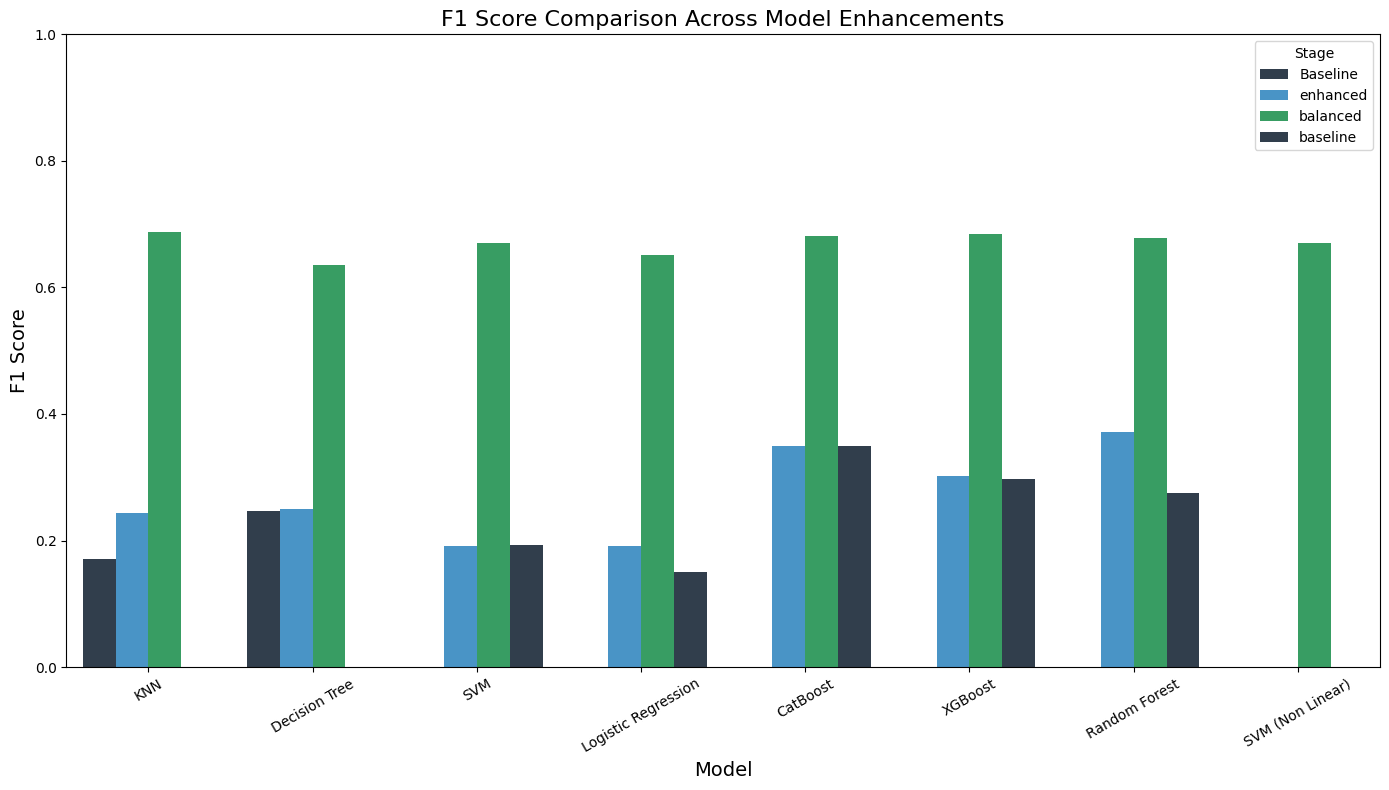

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_22196\1476445040.py:38: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_22196\1476445040.py:38: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_22196\1476445040.py:38: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_22196\1476445040.py:38: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


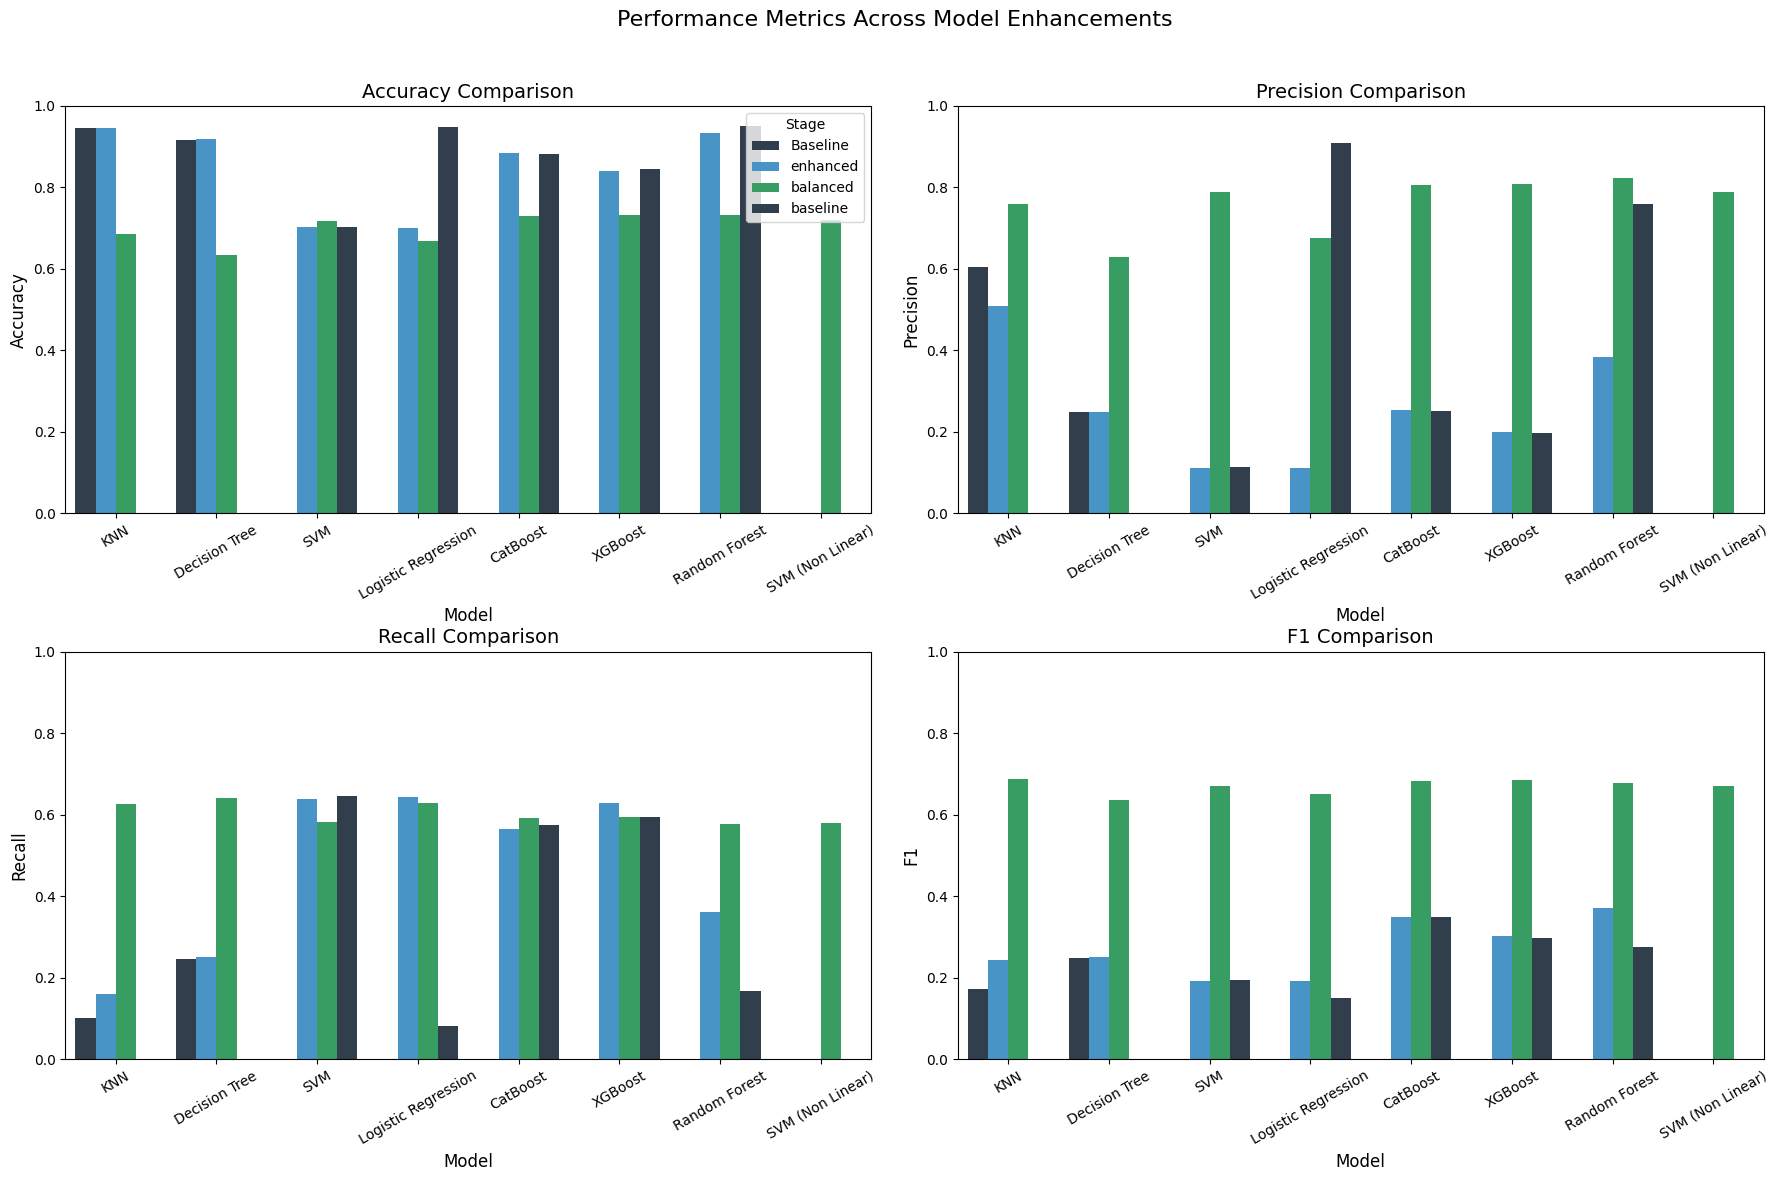

In [ ]:

results_df = pd.DataFrame([
    {'Model': model, 
     'Stage': stage, 
     'Metric': metric, 
     'Value': value} 
    for model, stages in results.items() 
    for stage, metrics in stages.items() 
    for metric, value in metrics.items()
])

# visualization of results
plt.figure(figsize=(14, 8))
f1_plot = sns.barplot(
    data=results_df[results_df['Metric'] == 'f1'],
    x='Model', 
    y='Value', 
    hue='Stage',
    palette=['#2c3e50', '#3498db', '#27ae60']
)
plt.title('F1 Score Comparison Across Model Enhancements', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.xticks(rotation=30)
plt.ylim(0, 1.0)
plt.legend(title='Stage')
plt.tight_layout()
plt.show()

# Create comparison for metrics
metrics = ['accuracy', 'precision', 'recall', 'f1']
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.barplot(
        data=results_df[results_df['Metric'] == metric],
        x='Model', 
        y='Value', 
        hue='Stage',
        palette=['#2c3e50', '#3498db', '#27ae60'],
        ax=ax
    )
    ax.set_title(f'{metric.capitalize()} Comparison', fontsize=14)
    ax.set_xlabel('Model', fontsize=12)
    ax.set_ylabel(metric.capitalize(), fontsize=12)
    ax.set_ylim(0, 1.0)
    ax.tick_params(axis='x', rotation=30)
    if i == 0:
        ax.legend(title='Stage')
    else:
        ax.legend([],[], frameon=False)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Performance Metrics Across Model Enhancements', fontsize=16)
plt.show()